In [ ]:
!pip install -U tensorflow-io==0.16.0
!pip install labelme
# restart runtime
os.kill(os.getpid(), 9)

# **Libraries & Load Data**

In [29]:
from google.colab import drive
drive.mount('/content/drive/')

import os
import sys
import labelme
import random
import pandas as pd
# from IPython.display import display
from IPython import display
pd.options.display.max_columns = None
import numpy as np
import datetime
import time

import cv2
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use("dark_background")

import tensorflow_io as tfio
import tensorflow as tf
import tensorflow.keras.backend as K
print(tf.__version__)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
2.3.4


## **LOAD DATA**

In [30]:
mask_files = glob('/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Dataset_BenhVien_DHYD_toLGG_Processing/*/*FLAIR*/*_mask*')
# mask_files = glob('/content/drive/My Drive/Nam4_HK2/Dataset_BenhVien_DHYD_toLGG/*/*FLAIR*/*_mask*')

train_files = [file.replace('_mask', '') for file in mask_files]
print(train_files)
print(mask_files)
print(len(train_files))
print(len(mask_files))


['/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Dataset_BenhVien_DHYD_toLGG_Processing/ĐÀO VĂN THẮM/Series_008_Ax T2 FLAIR enhflair/IM000000.jpg', '/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Dataset_BenhVien_DHYD_toLGG_Processing/ĐÀO VĂN THẮM/Series_008_Ax T2 FLAIR enhflair/IM000001.jpg', '/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Dataset_BenhVien_DHYD_toLGG_Processing/ĐÀO VĂN THẮM/Series_008_Ax T2 FLAIR enhflair/IM000002.jpg', '/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Dataset_BenhVien_DHYD_toLGG_Processing/ĐÀO VĂN THẮM/Series_008_Ax T2 FLAIR enhflair/IM000003.jpg', '/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Dataset_BenhVien_DHYD_toLGG_Processing/ĐÀO VĂN THẮM/Series_008_Ax T2 FLAIR enhflair/IM000004.jpg', '/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Dataset_BenhVien_DHYD_

In [31]:
def diagnosis(mask_path):
  value = np.max(cv2.imread(mask_path))
  return 1 if value > 0 else 0

# print(len('/content/drive/My Drive/Nam4_HK2/LV_CT595/Pix2Pix_DHYD_BaiBaoKhoaHoc/Dataset_BenhVien_DHYD_toLGG_Processing/')) #108
START_NAME = 108
LEN_NAME = 35 

def patient(mask_path, START_NAME, LEN_NAME):
  return mask_path[START_NAME:START_NAME+LEN_NAME]

df = pd.DataFrame({"patient": [patient(x, START_NAME, LEN_NAME) for x in mask_files],
                   "image_path": train_files,
                   "mask_path": mask_files,
                   "diagnosis":[diagnosis(x) for x in mask_files]})
df

,patient,image_path,mask_path,diagnosis
0,essing/ĐÀO VĂN THẮM/Series_008_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,0
1,essing/ĐÀO VĂN THẮM/Series_008_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,0
2,essing/ĐÀO VĂN THẮM/Series_008_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,0
3,essing/ĐÀO VĂN THẮM/Series_008_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,1
4,essing/ĐÀO VĂN THẮM/Series_008_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,1
...,...,...,...,...
2150,essing/NGUYỄN VĂN MUNG/Series_00,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,0
2151,essing/NGUYỄN VĂN MUNG/Series_00,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,0
2152,essing/NGUYỄN VĂN MUNG/Series_00,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,0
2153,essing/NGUYỄN VĂN MUNG/Series_00,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,0


## **Data Distribution & Visualization**

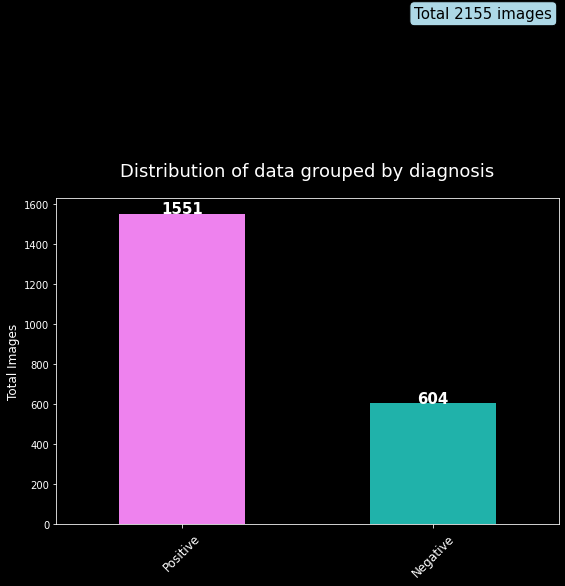

In [32]:
# Plot
ax = df.diagnosis.value_counts().plot(kind='bar',
                                      stacked=True,
                                      figsize=(9, 6),
                                     color=["violet", "lightseagreen"])


ax.set_xticklabels(["Positive", "Negative"], rotation=45, fontsize=12);
ax.set_ylabel('Total Images', fontsize = 12)
ax.set_title("Distribution of data grouped by diagnosis",fontsize = 18, y=1.05)

# Annotate
for i, rows in enumerate(df.diagnosis.value_counts().values):
    ax.annotate(int(rows), xy=(i, rows-12), 
                rotation=0, color="white", 
                ha="center", verticalalignment='bottom', 
                fontsize=15, fontweight="bold")
    
ax.text(1.2, 2550, f"Total {len(df)} images", size=15,
        color="black",
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   fc=("lightblue"),
                   ec=("black"),
                   )
         );

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105]), <a list of 106 Text major ticklabel objects>)

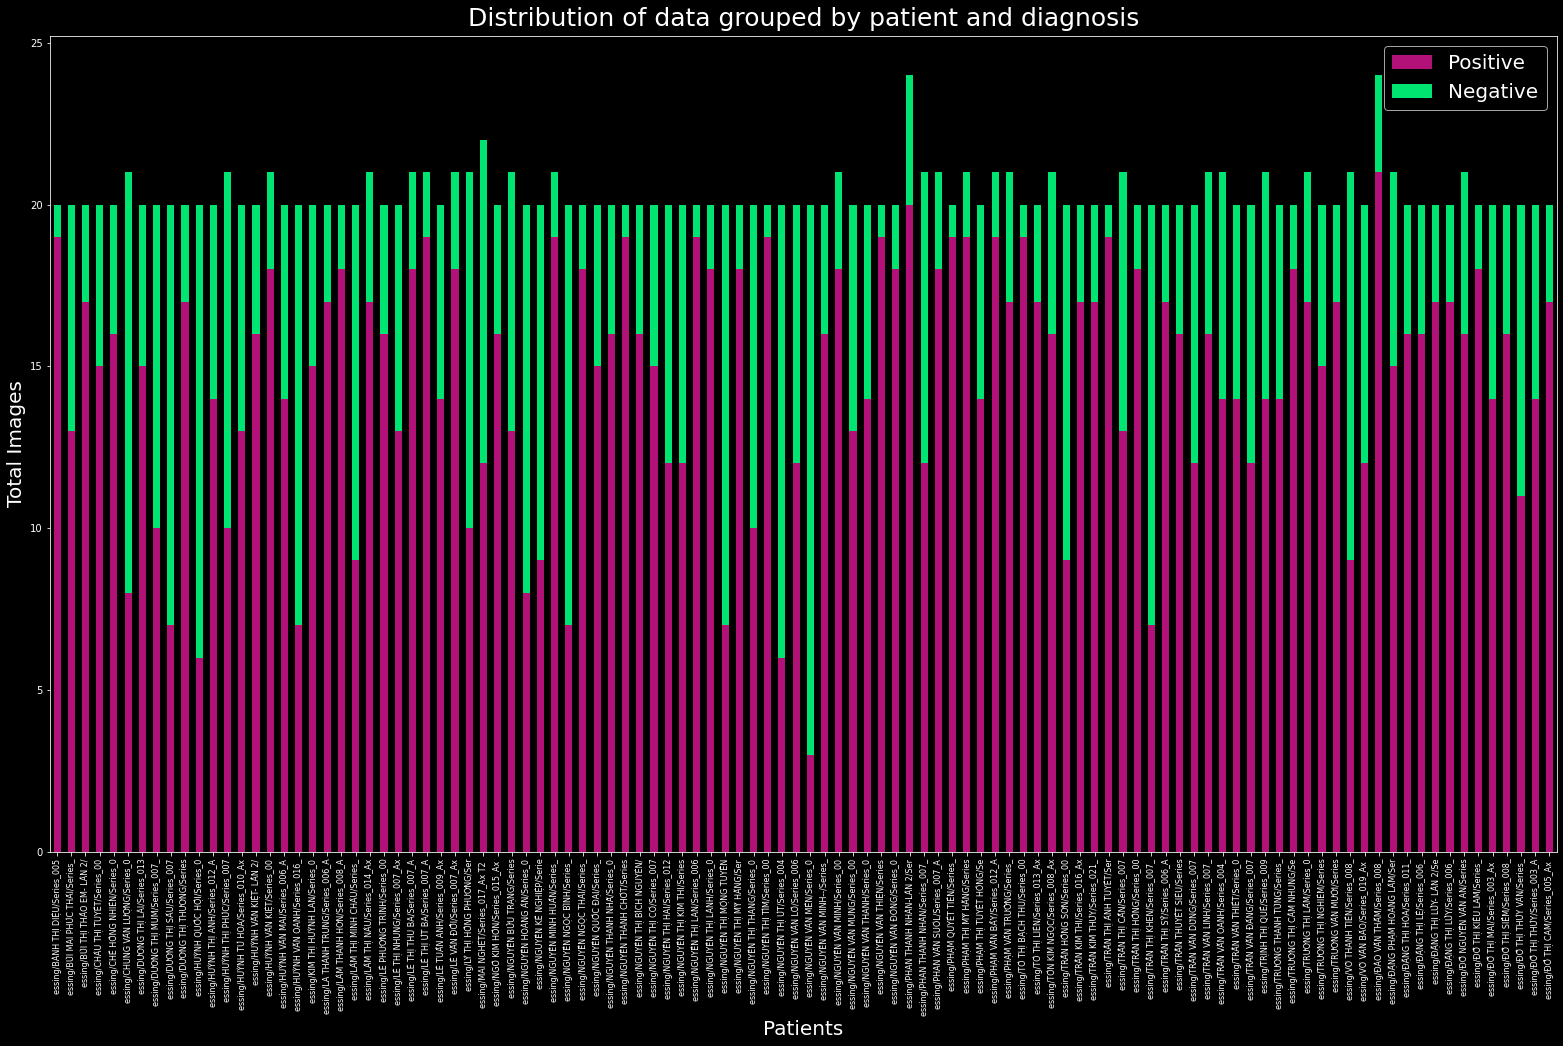

In [33]:
# Data
patients_by_diagnosis = df.groupby(['patient', 'diagnosis'])['diagnosis'].size().unstack().fillna(0)
patients_by_diagnosis.columns = ["Positive", "Negative"]

# Plot
ax = patients_by_diagnosis.plot(kind='bar',stacked=True,
                                figsize=(27, 15),
                                color=["mediumvioletred", "springgreen"], 
                                alpha=0.9)
ax.legend(fontsize=20);
ax.set_xlabel('Patients',fontsize = 20)
ax.set_ylabel('Total Images', fontsize = 20)
ax.set_title("Distribution of data grouped by patient and diagnosis",fontsize = 25, y=1.005)
plt.xticks(fontsize=8)


# # Annotations
# for i, rows in enumerate(patients_by_diagnosis.values):
#     plt.annotate(int(rows[0]), xy=(i, rows[0]+1), rotation=90, color="white")
#     plt.annotate(int(rows[1]), xy=(i, rows[1]+1), rotation=90, color="aqua");


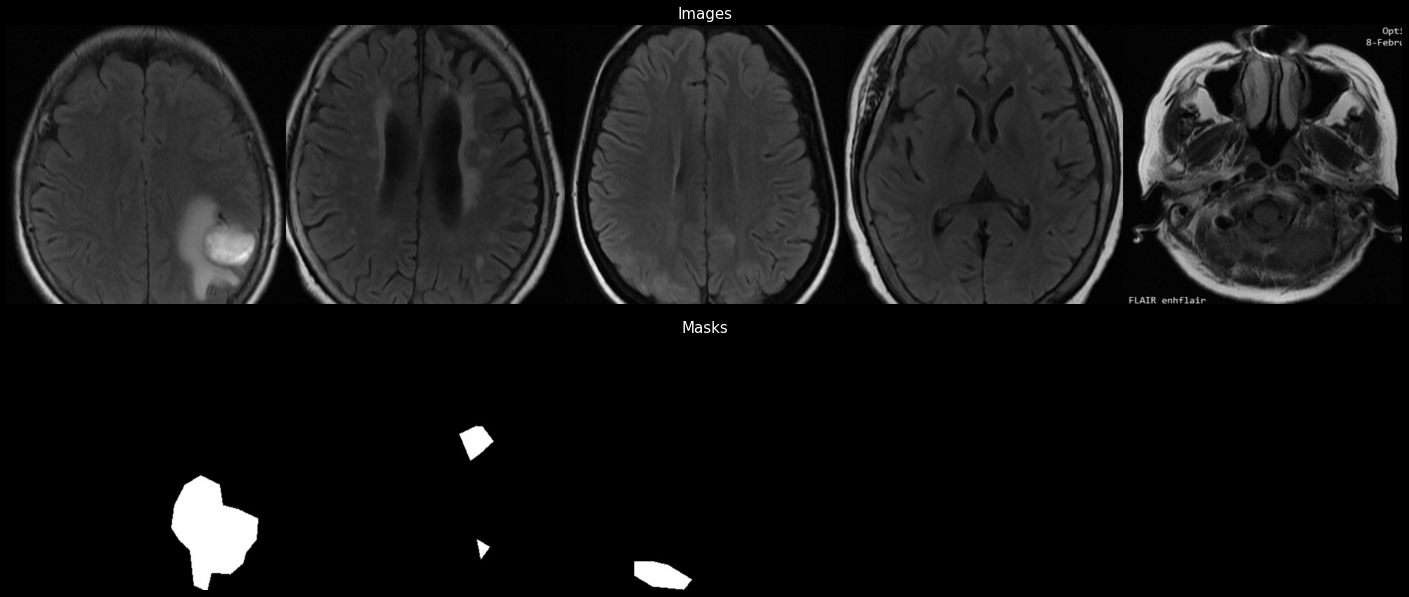

In [34]:
# Visualization (3 positive - 2 negative)

sample_df_positive = df[df["diagnosis"] == 1].sample(3)
sample_df_negative = df[df["diagnosis"] == 0].sample(2)
sample_df = sample_df_positive.append(sample_df_negative, ignore_index=True).values
sample_imgs = []
for i, data in enumerate(sample_df):
    #print(data)
    img = cv2.resize(cv2.imread(data[1]), (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = cv2.resize(cv2.imread(data[2]), (512, 512))
    sample_imgs.extend([img, mask])


sample_imgs_arr = np.hstack(np.array(sample_imgs[::2]))
sample_masks_arr = np.hstack(np.array(sample_imgs[1::2]))

# Plot
fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 1),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


grid[0].imshow(sample_imgs_arr, cmap='gray')
grid[0].set_title("Images", fontsize=15)
grid[0].axis("off")
grid[1].imshow(sample_masks_arr)
grid[1].set_title("Masks", fontsize=15, y=0.9)
grid[1].axis("off")
plt.show()

## **Test**

In [35]:
# DF_Final
# Chia theo BN
df_final = pd.read_excel("/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Classifi/final/df_lan1.xlsx")
# df_final = pd.read_excel("/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Classifi/final/df_lan2.xlsx")
# df_final = pd.read_excel("/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Classifi/final/df_lan3.xlsx")
# df_final = pd.read_excel("/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Classifi/final/df_lan4.xlsx")
# df_final = pd.read_excel("/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Classifi/final/df_lan5.xlsx")


# Chia theo anh
# df_final = pd.read_excel("/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Classifi/final/df_split1.xlsx")
# df_final = pd.read_excel("/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Classifi/final/df_split10.xlsx")
# df_final = pd.read_excel("/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Classifi/final/df_split20.xlsx")
# df_final = pd.read_excel("/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Classifi/final/df_split50.xlsx")
# df_final = pd.read_excel("/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc/Classifi/final/df_split100.xlsx")


# Test lai Pix2Pix Original -- Chia theo BNhan
checkpoint_dir = 'training_checkpoints/final/Pix2Pix_lan1/'


# df_final = df_final[df_final['diagnosis']==1]
df_final

,Unnamed: 0,patient,image_path,mask_path,diagnosis
0,0,essing/HUỲNH VĂN KIỆT- LẦN 2/,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,0
1,1,essing/PHẠM QUYẾT TIẾN/Series_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,0
2,16,essing/VÕ THANH TIẾN/Series_008_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,1
3,21,essing/LÂM THỊ MINH CHÂU/Series_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,0
4,27,essing/VÕ THANH TIẾN/Series_008_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,1
...,...,...,...,...,...
91,393,essing/PHẠM THỊ MỸ HẰNG/Series,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,1
92,395,essing/VÕ THANH TIẾN/Series_008_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,1
93,396,essing/VÕ THANH TIẾN/Series_008_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,1
94,398,essing/TRƯƠNG THANH TÙNG/Series_,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLi...,1


In [36]:
list_patient = df['patient'].value_counts().index.tolist()
# print(len(list_patient))

import random
random.shuffle(list_patient)

# list_patient_val = list_patient[:10]
# list_patient_test = list_patient[10:30]
# list_patient_train = list_patient[30:]

# Lan 1
list_patient_val = ['essing/TRỊNH THỊ QUẾ/Series_009', 'essing/BÙI MAI PHÚC THÁI/Series_', 'essing/VÕ VĂN BÁO/Series_019_Ax ', 'essing/HUỲNH TÚ HOA/Series_010_Ax', 'essing/NGUYỄN VĂN THANH/Series_0', 'essing/KIM THỊ HUỲNH LAN/Series_0', 'essing/NGUYỄN VĂN MINH/Series_00', 'essing/PHAN THANH NHÀN-LẦN 2/Ser', 'essing/DƯƠNG THỊ MUM/Series_007_', 'essing/LA THÀNH TRUNG/Series_006_A']

list_patient_test = ['essing/PHAN THANH NHÀN/Series_007_', 'essing/TRẦN KIM THI/Series_016_Ax', 'essing/ĐẶNG THỊ LỆ/Series_006_', 'essing/NGUYỄN MINH HUẤN/Series_', 'essing/ĐỖ THỊ KIỀU LAM/Series_', 'essing/HUỲNH VĂN KIỆT- LẦN 2/', 'essing/NGUYỄN THANH NHÃ/Series_0', 'essing/TRẦN HỒNG SƠN/Series_00', 'essing/TRƯƠNG THỊ CẦM NHUNG/Se', 'essing/LÂM THỊ MINH CHÂU/Series_', 'essing/TRẦN VĂN DŨNG/Series_007', 'essing/NGUYỄN THỊ LAN/Series_006', 'essing/VÕ THANH TIẾN/Series_008_', 'essing/LÊ THỊ ÚT BA/Series_007_A', 'essing/PHẠM THỊ MỸ HẰNG/Series', 'essing/PHẠM QUYẾT TIẾN/Series_', 'essing/TRƯƠNG THANH TÙNG/Series_', 'essing/ĐẶNG PHẠM HOÀNG LÂM/Ser', 'essing/LÊ THỊ NHUNG/Series_007_Ax', 'essing/HUỲNH VĂN OANH/Series_016_']

list_patient_train = ['essing/HUỲNH THỊ PHÚC/Series_007', 'essing/PHẠM THỊ TUYẾT HỒNG/Se', 'essing/TÔN KIM NGỌC/Series_008_Ax', 'essing/TRẦN THỊ CẤN/Series_007', 'essing/ĐẶNG THỊ HÒA/Series_011_', 'essing/NGUYỄN THỊ CÓ/Series_007', 'essing/ĐỖ THỊ THÚY VÂN/Series_', 'essing/NGUYỄN VĂN ĐÔNG/Series_0', 'essing/PHẠM VĂN TRƯỜNG/Series_', 'essing/TÔ THỊ BẠCH THU/Series_00', 'essing/TRẦN KIM THÚY/Series_021_', 'essing/NGUYỄN THỊ LÀNH/Series_0', 'essing/LÂM THỊ NÂU/Series_014_Ax', 'essing/TRƯƠNG THỊ NGHIÊM/Series', 'essing/CHẾ HỒNG NHIÊN/Series_0', 'essing/NGUYỄN VĂN LÔ/Series_006', 'essing/NGUYỄN VĂN THIỆN/Series', 'essing/ĐẶNG THỊ LỦY- LẦN 2/Se', 'essing/BÀNH THỊ DIỆU/Series_005', 'essing/TÔ THỊ LIÊN/Series_013_Ax', 'essing/ĐỖ THỊ THÚY/Series_003_A', 'essing/NGUYỄN VĂN MINH--/Series_', 'essing/ĐỖ THỊ MAI/Series_003_Ax ', 'essing/TRẦN VĂN OANH/Series_004_', 'essing/ĐẶNG THỊ LỦY/Series_006_', 'essing/NGUYỄN VĂN MUNG/Series_00', 'essing/NGUYỄN THỊ MỘNG TUYỀN', 'essing/ĐỖ THỊ SIỂM/Series_008_', 'essing/TRƯƠNG VĂN MƯỜI/Series', 'essing/LÊ PHƯƠNG TRINH/Series_00', 'essing/NGUYỄN THỊ MỸ HẰNG/Ser', 'essing/TRẦN THUYẾT SIÊU/Series', 'essing/NGUYỄN NGỌC BÌNH/Series_', 'essing/NGUYỄN NGỌC THÁI/Series_', 'essing/TRẦN VĂN THIẾT/Series_0', 'essing/TRẦN THỊ KHEN/Series_007_', 'essing/NGUYỄN KẾ NGHIỆP/Serie', 'essing/CHUNG VĂN LƯỢNG/Series_0', 'essing/PHAN VĂN SUÔL/Series_007_A', 'essing/DƯƠNG THỊ SÁU/Series_007', 'essing/NGUYỄN THỊ TÍM/Series_00', 'essing/LÝ THỊ HỒNG PHƯƠNG/Ser', 'essing/LÂM THANH HƠN/Series_008_A', 'essing/TRẦN THỊ HỒNG/Series_00', 'essing/LÊ THỊ THU BA/Series_007_A', 'essing/NGUYỄN BỬU TRẠNG/Series', 'essing/NGUYỄN THỊ KIM THI/Series', 'essing/LÊ VĂN ĐỔI/Series_007_Ax', 'essing/DƯƠNG THỊ LÀI/Series_013', 'essing/TRẦN THỊ ÁNH TUYẾT/Ser', 'essing/NGUYỄN THÀNH CHÓT/Series', 'essing/TRẦN VĂN ĐÁNG/Series_007', 'essing/BÙI THỊ THẢO EM- LẦN 2/', 'essing/ĐỔ THỊ CAM/Series_005_Ax ', 'essing/LÊ TUẤN ANH/Series_009_Ax', 'essing/DƯƠNG THỊ THƯƠNG/Series', 'essing/HUỲNH QUỐC HỘI/Series_0', 'essing/HUỲNH THỊ ANH/Series_012_A', 'essing/ĐỖ NGUYỄN VĂN AN/Series', 'essing/NGÔ KIM HÔN/Series_015_Ax ', 'essing/NGUYỄN VĂN MẾN/Series_0', 'essing/HUỲNH VĂN MAI/Series_006_A', 'essing/TRẦN VĂN LINH/Series_007_', 'essing/NGUYỄN THỊ HAI/Series_012', 'essing/TRẦN THỊ SỶ/Series_006_A', 'essing/NGUYỄN THỊ BÍCH NGUYÊN/', 'essing/MAI NGHÉT/Series_017_Ax T2 ', 'essing/TRƯƠNG THỊ LẮM/Series_0', 'essing/HUỲNH VĂN KIỆT/Series_00', 'essing/NGUYỄN QUỐC ĐẠI/Series_', 'essing/NGUYỄN THỊ ÚT/Series_004', 'essing/ĐÀO VĂN THẮM/Series_008_', 'essing/NGUYỄN THỊ THANG/Series_0', 'essing/PHẠM VĂN BẢY/Series_012_A', 'essing/CHÂU THỊ TUYẾT/Series_00', 'essing/NGUYỄN HOÀNG ÂN/Series_0']
# 406/110

# # Lan 2
# list_patient_val = ['essing/NGUYỄN THỊ THANG/Series_0', 'essing/NGUYỄN VĂN MINH/Series_00', 'essing/NGUYỄN THỊ LÀNH/Series_0', 'essing/TRẦN KIM THI/Series_016_Ax', 'essing/DƯƠNG THỊ LÀI/Series_013', 'essing/PHAN THANH NHÀN-LẦN 2/Ser', 'essing/ĐẶNG THỊ LỦY/Series_006_', 'essing/TRẦN THỊ KHEN/Series_007_', 'essing/ĐỔ THỊ CAM/Series_005_Ax ', 'essing/HUỲNH THỊ ANH/Series_012_A']

# list_patient_test = ['essing/NGUYỄN NGỌC BÌNH/Series_', 'essing/TRƯƠNG THỊ CẦM NHUNG/Se', 'essing/TRƯƠNG THỊ NGHIÊM/Series', 'essing/HUỲNH VĂN MAI/Series_006_A', 'essing/NGUYỄN THỊ ÚT/Series_004', 'essing/ĐỖ NGUYỄN VĂN AN/Series', 'essing/ĐÀO VĂN THẮM/Series_008_', 'essing/HUỲNH VĂN KIỆT/Series_00', 'essing/LÊ TUẤN ANH/Series_009_Ax', 'essing/PHẠM QUYẾT TIẾN/Series_', 'essing/TRẦN VĂN ĐÁNG/Series_007', 'essing/NGÔ KIM HÔN/Series_015_Ax ', 'essing/TÔN KIM NGỌC/Series_008_Ax', 'essing/TRẦN THỊ HỒNG/Series_00', 'essing/TRƯƠNG THỊ LẮM/Series_0', 'essing/NGUYỄN THỊ KIM THI/Series', 'essing/LÊ VĂN ĐỔI/Series_007_Ax', 'essing/ĐỖ THỊ MAI/Series_003_Ax ', 'essing/LÊ PHƯƠNG TRINH/Series_00', 'essing/PHẠM THỊ MỸ HẰNG/Series']

# list_patient_train = ['essing/ĐẶNG PHẠM HOÀNG LÂM/Ser', 'essing/HUỲNH QUỐC HỘI/Series_0', 'essing/NGUYỄN VĂN MINH--/Series_', 'essing/TRẦN VĂN OANH/Series_004_', 'essing/ĐẶNG THỊ LỦY- LẦN 2/Se', 'essing/BÙI THỊ THẢO EM- LẦN 2/', 'essing/TRƯƠNG THANH TÙNG/Series_', 'essing/NGUYỄN THỊ HAI/Series_012', 'essing/NGUYỄN THỊ LAN/Series_006', 'essing/NGUYỄN THỊ MỸ HẰNG/Ser', 'essing/LÊ THỊ NHUNG/Series_007_Ax', 'essing/DƯƠNG THỊ MUM/Series_007_', 'essing/KIM THỊ HUỲNH LAN/Series_0', 'essing/ĐẶNG THỊ LỆ/Series_006_', 'essing/ĐỖ THỊ KIỀU LAM/Series_', 'essing/CHUNG VĂN LƯỢNG/Series_0', 'essing/TÔ THỊ BẠCH THU/Series_00', 'essing/TRẦN THUYẾT SIÊU/Series', 'essing/TRẦN HỒNG SƠN/Series_00', 'essing/CHẾ HỒNG NHIÊN/Series_0', 'essing/BÙI MAI PHÚC THÁI/Series_', 'essing/ĐỖ THỊ THÚY VÂN/Series_', 'essing/ĐẶNG THỊ HÒA/Series_011_', 'essing/PHẠM VĂN TRƯỜNG/Series_', 'essing/LÂM THỊ NÂU/Series_014_Ax', 'essing/HUỲNH VĂN OANH/Series_016_', 'essing/NGUYỄN VĂN ĐÔNG/Series_0', 'essing/NGUYỄN VĂN MẾN/Series_0', 'essing/NGUYỄN QUỐC ĐẠI/Series_', 'essing/TÔ THỊ LIÊN/Series_013_Ax', 'essing/LÂM THỊ MINH CHÂU/Series_', 'essing/DƯƠNG THỊ THƯƠNG/Series', 'essing/NGUYỄN THỊ CÓ/Series_007', 'essing/NGUYỄN MINH HUẤN/Series_', 'essing/PHAN THANH NHÀN/Series_007_', 'essing/TRẦN THỊ SỶ/Series_006_A', 'essing/LÝ THỊ HỒNG PHƯƠNG/Ser', 'essing/TRẦN VĂN LINH/Series_007_', 'essing/NGUYỄN THỊ MỘNG TUYỀN', 'essing/NGUYỄN VĂN THANH/Series_0', 'essing/NGUYỄN HOÀNG ÂN/Series_0', 'essing/MAI NGHÉT/Series_017_Ax T2 ', 'essing/DƯƠNG THỊ SÁU/Series_007', 'essing/HUỲNH TÚ HOA/Series_010_Ax', 'essing/NGUYỄN THỊ TÍM/Series_00', 'essing/NGUYỄN VĂN THIỆN/Series', 'essing/PHAN VĂN SUÔL/Series_007_A', 'essing/VÕ THANH TIẾN/Series_008_', 'essing/NGUYỄN BỬU TRẠNG/Series', 'essing/NGUYỄN VĂN MUNG/Series_00', 'essing/NGUYỄN THỊ BÍCH NGUYÊN/', 'essing/TRƯƠNG VĂN MƯỜI/Series', 'essing/ĐỖ THỊ SIỂM/Series_008_', 'essing/HUỲNH THỊ PHÚC/Series_007', 'essing/PHẠM VĂN BẢY/Series_012_A', 'essing/NGUYỄN NGỌC THÁI/Series_', 'essing/LÊ THỊ ÚT BA/Series_007_A', 'essing/LA THÀNH TRUNG/Series_006_A', 'essing/NGUYỄN KẾ NGHIỆP/Serie', 'essing/BÀNH THỊ DIỆU/Series_005', 'essing/NGUYỄN VĂN LÔ/Series_006', 'essing/PHẠM THỊ TUYẾT HỒNG/Se', 'essing/TRẦN THỊ CẤN/Series_007', 'essing/LÂM THANH HƠN/Series_008_A', 'essing/ĐỖ THỊ THÚY/Series_003_A', 'essing/TRẦN THỊ ÁNH TUYẾT/Ser', 'essing/CHÂU THỊ TUYẾT/Series_00', 'essing/VÕ VĂN BÁO/Series_019_Ax ', 'essing/NGUYỄN THANH NHÃ/Series_0', 'essing/NGUYỄN THÀNH CHÓT/Series', 'essing/TRẦN VĂN THIẾT/Series_0', 'essing/TRẦN KIM THÚY/Series_021_', 'essing/LÊ THỊ THU BA/Series_007_A', 'essing/TRỊNH THỊ QUẾ/Series_009', 'essing/HUỲNH VĂN KIỆT- LẦN 2/', 'essing/TRẦN VĂN DŨNG/Series_007']
# # (410, 4) (104, 4)

# # Lan 3
# list_patient_val = ['essing/PHẠM THỊ MỸ HẰNG/Series', 'essing/VÕ THANH TIẾN/Series_008_', 'essing/DƯƠNG THỊ MUM/Series_007_', 'essing/NGUYỄN THỊ MỘNG TUYỀN', 'essing/NGUYỄN THỊ ÚT/Series_004', 'essing/LÊ THỊ NHUNG/Series_007_Ax', 'essing/BÀNH THỊ DIỆU/Series_005', 'essing/LÊ VĂN ĐỔI/Series_007_Ax', 'essing/HUỲNH THỊ PHÚC/Series_007', 'essing/NGUYỄN THỊ TÍM/Series_00']

# list_patient_test = ['essing/NGUYỄN VĂN MINH/Series_00', 'essing/NGUYỄN THỊ CÓ/Series_007', 'essing/PHAN THANH NHÀN/Series_007_', 'essing/LÂM THANH HƠN/Series_008_A', 'essing/ĐẶNG THỊ HÒA/Series_011_', 'essing/TRẦN VĂN LINH/Series_007_', 'essing/DƯƠNG THỊ SÁU/Series_007', 'essing/LÊ THỊ ÚT BA/Series_007_A', 'essing/TRẦN THỊ CẤN/Series_007', 'essing/TRƯƠNG VĂN MƯỜI/Series', 'essing/LÝ THỊ HỒNG PHƯƠNG/Ser', 'essing/ĐỖ THỊ THÚY VÂN/Series_', 'essing/NGUYỄN THỊ BÍCH NGUYÊN/', 'essing/NGUYỄN VĂN THANH/Series_0', 'essing/HUỲNH VĂN KIỆT- LẦN 2/', 'essing/ĐẶNG THỊ LỆ/Series_006_', 'essing/TRẦN VĂN THIẾT/Series_0', 'essing/TRƯƠNG THANH TÙNG/Series_', 'essing/NGUYỄN VĂN LÔ/Series_006', 'essing/ĐỖ NGUYỄN VĂN AN/Series']

# list_patient_train = ['essing/NGUYỄN THỊ THANG/Series_0', 'essing/PHAN VĂN SUÔL/Series_007_A', 'essing/PHẠM VĂN BẢY/Series_012_A', 'essing/TRƯƠNG THỊ LẮM/Series_0', 'essing/PHAN THANH NHÀN-LẦN 2/Ser', 'essing/NGUYỄN THỊ LAN/Series_006', 'essing/NGUYỄN VĂN THIỆN/Series', 'essing/ĐỖ THỊ THÚY/Series_003_A', 'essing/TRẦN HỒNG SƠN/Series_00', 'essing/TRẦN VĂN OANH/Series_004_', 'essing/NGUYỄN KẾ NGHIỆP/Serie', 'essing/TÔ THỊ BẠCH THU/Series_00', 'essing/TRỊNH THỊ QUẾ/Series_009', 'essing/HUỲNH VĂN MAI/Series_006_A', 'essing/LÊ THỊ THU BA/Series_007_A', 'essing/NGUYỄN NGỌC BÌNH/Series_', 'essing/NGUYỄN THANH NHÃ/Series_0', 'essing/NGUYỄN BỬU TRẠNG/Series', 'essing/TRẦN KIM THÚY/Series_021_', 'essing/VÕ VĂN BÁO/Series_019_Ax ', 'essing/BÙI MAI PHÚC THÁI/Series_', 'essing/NGUYỄN VĂN MUNG/Series_00', 'essing/BÙI THỊ THẢO EM- LẦN 2/', 'essing/DƯƠNG THỊ THƯƠNG/Series', 'essing/LÊ PHƯƠNG TRINH/Series_00', 'essing/TÔ THỊ LIÊN/Series_013_Ax', 'essing/ĐẶNG THỊ LỦY/Series_006_', 'essing/ĐỖ THỊ SIỂM/Series_008_', 'essing/CHẾ HỒNG NHIÊN/Series_0', 'essing/NGUYỄN VĂN MINH--/Series_', 'essing/NGUYỄN QUỐC ĐẠI/Series_', 'essing/TRẦN VĂN ĐÁNG/Series_007', 'essing/NGUYỄN VĂN ĐÔNG/Series_0', 'essing/NGUYỄN MINH HUẤN/Series_', 'essing/LÂM THỊ MINH CHÂU/Series_', 'essing/CHUNG VĂN LƯỢNG/Series_0', 'essing/ĐỔ THỊ CAM/Series_005_Ax ', 'essing/DƯƠNG THỊ LÀI/Series_013', 'essing/NGUYỄN THỊ MỸ HẰNG/Ser', 'essing/TÔN KIM NGỌC/Series_008_Ax', 'essing/NGUYỄN NGỌC THÁI/Series_', 'essing/HUỲNH QUỐC HỘI/Series_0', 'essing/NGUYỄN THỊ KIM THI/Series', 'essing/NGUYỄN THÀNH CHÓT/Series', 'essing/ĐỖ THỊ MAI/Series_003_Ax ', 'essing/NGUYỄN HOÀNG ÂN/Series_0', 'essing/TRƯƠNG THỊ NGHIÊM/Series', 'essing/HUỲNH VĂN KIỆT/Series_00', 'essing/ĐẶNG THỊ LỦY- LẦN 2/Se', 'essing/TRẦN THỊ SỶ/Series_006_A', 'essing/TRƯƠNG THỊ CẦM NHUNG/Se', 'essing/HUỲNH THỊ ANH/Series_012_A', 'essing/ĐỖ THỊ KIỀU LAM/Series_', 'essing/HUỲNH VĂN OANH/Series_016_', 'essing/NGUYỄN THỊ LÀNH/Series_0', 'essing/PHẠM VĂN TRƯỜNG/Series_', 'essing/HUỲNH TÚ HOA/Series_010_Ax', 'essing/MAI NGHÉT/Series_017_Ax T2 ', 'essing/PHẠM QUYẾT TIẾN/Series_', 'essing/TRẦN THỊ HỒNG/Series_00', 'essing/PHẠM THỊ TUYẾT HỒNG/Se', 'essing/TRẦN THỊ KHEN/Series_007_', 'essing/LÊ TUẤN ANH/Series_009_Ax', 'essing/TRẦN THUYẾT SIÊU/Series', 'essing/ĐÀO VĂN THẮM/Series_008_', 'essing/NGUYỄN VĂN MẾN/Series_0', 'essing/TRẦN VĂN DŨNG/Series_007', 'essing/CHÂU THỊ TUYẾT/Series_00', 'essing/TRẦN KIM THI/Series_016_Ax', 'essing/KIM THỊ HUỲNH LAN/Series_0', 'essing/TRẦN THỊ ÁNH TUYẾT/Ser', 'essing/ĐẶNG PHẠM HOÀNG LÂM/Ser', 'essing/NGÔ KIM HÔN/Series_015_Ax ', 'essing/NGUYỄN THỊ HAI/Series_012', 'essing/LA THÀNH TRUNG/Series_006_A', 'essing/LÂM THỊ NÂU/Series_014_Ax']
# # (407, 4) (117, 4)

# # Lan 4
# list_patient_val = ['essing/NGUYỄN THỊ THANG/Series_0', 'essing/TRẦN THỊ CẤN/Series_007', 'essing/ĐẶNG PHẠM HOÀNG LÂM/Ser', 'essing/VÕ VĂN BÁO/Series_019_Ax ', 'essing/NGUYỄN THỊ MỘNG TUYỀN', 'essing/ĐỖ THỊ THÚY VÂN/Series_', 'essing/TRỊNH THỊ QUẾ/Series_009', 'essing/TRẦN THỊ SỶ/Series_006_A', 'essing/ĐỖ THỊ MAI/Series_003_Ax ', 'essing/BÙI THỊ THẢO EM- LẦN 2/']

# list_patient_test = ['essing/ĐẶNG THỊ LỆ/Series_006_', 'essing/LÊ THỊ ÚT BA/Series_007_A', 'essing/TÔN KIM NGỌC/Series_008_Ax', 'essing/PHẠM QUYẾT TIẾN/Series_', 'essing/NGUYỄN THỊ TÍM/Series_00', 'essing/TRƯƠNG THANH TÙNG/Series_', 'essing/NGUYỄN VĂN MẾN/Series_0', 'essing/ĐẶNG THỊ LỦY/Series_006_', 'essing/ĐỔ THỊ CAM/Series_005_Ax ', 'essing/NGUYỄN NGỌC BÌNH/Series_', 'essing/HUỲNH VĂN MAI/Series_006_A', 'essing/DƯƠNG THỊ SÁU/Series_007', 'essing/PHẠM THỊ MỸ HẰNG/Series', 'essing/NGUYỄN VĂN LÔ/Series_006', 'essing/TRẦN VĂN ĐÁNG/Series_007', 'essing/NGUYỄN KẾ NGHIỆP/Serie', 'essing/PHAN THANH NHÀN-LẦN 2/Ser', 'essing/CHUNG VĂN LƯỢNG/Series_0', 'essing/CHẾ HỒNG NHIÊN/Series_0', 'essing/NGUYỄN THỊ CÓ/Series_007']

# list_patient_train = ['essing/HUỲNH VĂN KIỆT/Series_00', 'essing/TRẦN THUYẾT SIÊU/Series', 'essing/HUỲNH VĂN KIỆT- LẦN 2/', 'essing/LA THÀNH TRUNG/Series_006_A', 'essing/LÊ VĂN ĐỔI/Series_007_Ax', 'essing/LÊ THỊ NHUNG/Series_007_Ax', 'essing/TRẦN VĂN LINH/Series_007_', 'essing/NGUYỄN THỊ BÍCH NGUYÊN/', 'essing/ĐỖ THỊ THÚY/Series_003_A', 'essing/PHẠM VĂN TRƯỜNG/Series_', 'essing/LÂM THỊ NÂU/Series_014_Ax', 'essing/ĐỖ NGUYỄN VĂN AN/Series', 'essing/NGUYỄN THÀNH CHÓT/Series', 'essing/HUỲNH TÚ HOA/Series_010_Ax', 'essing/DƯƠNG THỊ THƯƠNG/Series', 'essing/KIM THỊ HUỲNH LAN/Series_0', 'essing/TÔ THỊ BẠCH THU/Series_00', 'essing/NGUYỄN QUỐC ĐẠI/Series_', 'essing/NGUYỄN THỊ LAN/Series_006', 'essing/LÂM THANH HƠN/Series_008_A', 'essing/BÙI MAI PHÚC THÁI/Series_', 'essing/DƯƠNG THỊ MUM/Series_007_', 'essing/VÕ THANH TIẾN/Series_008_', 'essing/ĐẶNG THỊ HÒA/Series_011_', 'essing/NGUYỄN THỊ ÚT/Series_004', 'essing/ĐÀO VĂN THẮM/Series_008_', 'essing/PHAN VĂN SUÔL/Series_007_A', 'essing/TRẦN KIM THÚY/Series_021_', 'essing/LÝ THỊ HỒNG PHƯƠNG/Ser', 'essing/LÂM THỊ MINH CHÂU/Series_', 'essing/TRẦN THỊ HỒNG/Series_00', 'essing/TRẦN THỊ ÁNH TUYẾT/Ser', 'essing/LÊ PHƯƠNG TRINH/Series_00', 'essing/NGUYỄN THỊ LÀNH/Series_0', 'essing/TRƯƠNG VĂN MƯỜI/Series', 'essing/MAI NGHÉT/Series_017_Ax T2 ', 'essing/NGUYỄN THỊ KIM THI/Series', 'essing/TRƯƠNG THỊ LẮM/Series_0', 'essing/LÊ THỊ THU BA/Series_007_A', 'essing/TRƯƠNG THỊ NGHIÊM/Series', 'essing/HUỲNH THỊ ANH/Series_012_A', 'essing/LÊ TUẤN ANH/Series_009_Ax', 'essing/TRẦN VĂN OANH/Series_004_', 'essing/NGUYỄN HOÀNG ÂN/Series_0', 'essing/NGUYỄN NGỌC THÁI/Series_', 'essing/NGUYỄN VĂN MINH/Series_00', 'essing/ĐỖ THỊ SIỂM/Series_008_', 'essing/NGUYỄN VĂN THANH/Series_0', 'essing/ĐỖ THỊ KIỀU LAM/Series_', 'essing/HUỲNH THỊ PHÚC/Series_007', 'essing/TRẦN HỒNG SƠN/Series_00', 'essing/NGUYỄN THỊ MỸ HẰNG/Ser', 'essing/DƯƠNG THỊ LÀI/Series_013', 'essing/NGUYỄN MINH HUẤN/Series_', 'essing/TRẦN VĂN DŨNG/Series_007', 'essing/PHAN THANH NHÀN/Series_007_', 'essing/TRẦN THỊ KHEN/Series_007_', 'essing/PHẠM THỊ TUYẾT HỒNG/Se', 'essing/BÀNH THỊ DIỆU/Series_005', 'essing/TRẦN VĂN THIẾT/Series_0', 'essing/NGUYỄN THỊ HAI/Series_012', 'essing/TÔ THỊ LIÊN/Series_013_Ax', 'essing/NGUYỄN VĂN MINH--/Series_', 'essing/HUỲNH VĂN OANH/Series_016_', 'essing/TRƯƠNG THỊ CẦM NHUNG/Se', 'essing/NGUYỄN VĂN ĐÔNG/Series_0', 'essing/TRẦN KIM THI/Series_016_Ax', 'essing/ĐẶNG THỊ LỦY- LẦN 2/Se', 'essing/NGUYỄN THANH NHÃ/Series_0', 'essing/NGUYỄN VĂN THIỆN/Series', 'essing/CHÂU THỊ TUYẾT/Series_00', 'essing/PHẠM VĂN BẢY/Series_012_A', 'essing/HUỲNH QUỐC HỘI/Series_0', 'essing/NGUYỄN BỬU TRẠNG/Series', 'essing/NGÔ KIM HÔN/Series_015_Ax ', 'essing/NGUYỄN VĂN MUNG/Series_00']

# # Lan 5
# list_patient_val = ['essing/NGUYỄN THỊ TÍM/Series_00', 'essing/KIM THỊ HUỲNH LAN/Series_0', 'essing/TRẦN THỊ ÁNH TUYẾT/Ser', 'essing/ĐẶNG PHẠM HOÀNG LÂM/Ser', 'essing/PHẠM QUYẾT TIẾN/Series_', 'essing/NGUYỄN THỊ KIM THI/Series', 'essing/NGUYỄN HOÀNG ÂN/Series_0', 'essing/LÊ PHƯƠNG TRINH/Series_00', 'essing/NGUYỄN BỬU TRẠNG/Series', 'essing/PHẠM THỊ TUYẾT HỒNG/Se']

# list_patient_test = ['essing/NGUYỄN THỊ LAN/Series_006', 'essing/MAI NGHÉT/Series_017_Ax T2 ', 'essing/TRẦN KIM THÚY/Series_021_', 'essing/TRẦN VĂN ĐÁNG/Series_007', 'essing/NGUYỄN THỊ ÚT/Series_004', 'essing/DƯƠNG THỊ LÀI/Series_013', 'essing/NGUYỄN VĂN THIỆN/Series', 'essing/PHAN THANH NHÀN-LẦN 2/Ser', 'essing/CHẾ HỒNG NHIÊN/Series_0', 'essing/NGUYỄN NGỌC BÌNH/Series_', 'essing/CHUNG VĂN LƯỢNG/Series_0', 'essing/CHÂU THỊ TUYẾT/Series_00', 'essing/ĐẶNG THỊ LỆ/Series_006_', 'essing/TRẦN HỒNG SƠN/Series_00', 'essing/LA THÀNH TRUNG/Series_006_A', 'essing/NGUYỄN THỊ BÍCH NGUYÊN/', 'essing/HUỲNH QUỐC HỘI/Series_0', 'essing/NGUYỄN VĂN MUNG/Series_00', 'essing/PHẠM VĂN TRƯỜNG/Series_', 'essing/NGUYỄN VĂN LÔ/Series_006']

# list_patient_train = ['essing/TRƯƠNG THANH TÙNG/Series_', 'essing/ĐỖ THỊ THÚY VÂN/Series_', 'essing/HUỲNH VĂN MAI/Series_006_A', 'essing/TRƯƠNG THỊ CẦM NHUNG/Se', 'essing/ĐẶNG THỊ LỦY/Series_006_', 'essing/NGUYỄN MINH HUẤN/Series_', 'essing/TRỊNH THỊ QUẾ/Series_009', 'essing/LÝ THỊ HỒNG PHƯƠNG/Ser', 'essing/DƯƠNG THỊ THƯƠNG/Series', 'essing/LÂM THANH HƠN/Series_008_A', 'essing/ĐỖ THỊ SIỂM/Series_008_', 'essing/BÀNH THỊ DIỆU/Series_005', 'essing/PHAN VĂN SUÔL/Series_007_A', 'essing/NGUYỄN THỊ LÀNH/Series_0', 'essing/NGUYỄN VĂN THANH/Series_0', 'essing/ĐỖ THỊ KIỀU LAM/Series_', 'essing/NGUYỄN NGỌC THÁI/Series_', 'essing/ĐỔ THỊ CAM/Series_005_Ax ', 'essing/TRƯƠNG THỊ NGHIÊM/Series', 'essing/NGUYỄN THỊ MỸ HẰNG/Ser', 'essing/TRẦN KIM THI/Series_016_Ax', 'essing/TRẦN THỊ CẤN/Series_007', 'essing/HUỲNH VĂN OANH/Series_016_', 'essing/NGUYỄN KẾ NGHIỆP/Serie', 'essing/LÊ THỊ NHUNG/Series_007_Ax', 'essing/TRƯƠNG THỊ LẮM/Series_0', 'essing/NGUYỄN THỊ MỘNG TUYỀN', 'essing/TÔN KIM NGỌC/Series_008_Ax', 'essing/NGUYỄN QUỐC ĐẠI/Series_', 'essing/TRẦN THỊ HỒNG/Series_00', 'essing/BÙI THỊ THẢO EM- LẦN 2/', 'essing/HUỲNH VĂN KIỆT- LẦN 2/', 'essing/ĐỖ NGUYỄN VĂN AN/Series', 'essing/PHẠM VĂN BẢY/Series_012_A', 'essing/NGUYỄN THỊ HAI/Series_012', 'essing/TRẦN THỊ KHEN/Series_007_', 'essing/NGUYỄN THANH NHÃ/Series_0', 'essing/LÂM THỊ NÂU/Series_014_Ax', 'essing/LÊ THỊ THU BA/Series_007_A', 'essing/NGUYỄN THÀNH CHÓT/Series', 'essing/DƯƠNG THỊ SÁU/Series_007', 'essing/TRẦN VĂN DŨNG/Series_007', 'essing/VÕ VĂN BÁO/Series_019_Ax ', 'essing/HUỲNH TÚ HOA/Series_010_Ax', 'essing/TÔ THỊ BẠCH THU/Series_00', 'essing/NGUYỄN VĂN MINH/Series_00', 'essing/HUỲNH THỊ ANH/Series_012_A', 'essing/TRẦN VĂN THIẾT/Series_0', 'essing/NGUYỄN VĂN MINH--/Series_', 'essing/ĐỖ THỊ THÚY/Series_003_A', 'essing/TRẦN THUYẾT SIÊU/Series', 'essing/ĐẶNG THỊ HÒA/Series_011_', 'essing/LÂM THỊ MINH CHÂU/Series_', 'essing/TRẦN VĂN OANH/Series_004_', 'essing/HUỲNH VĂN KIỆT/Series_00', 'essing/VÕ THANH TIẾN/Series_008_', 'essing/ĐÀO VĂN THẮM/Series_008_', 'essing/ĐỖ THỊ MAI/Series_003_Ax ', 'essing/NGUYỄN VĂN MẾN/Series_0', 'essing/NGÔ KIM HÔN/Series_015_Ax ', 'essing/NGUYỄN THỊ CÓ/Series_007', 'essing/LÊ THỊ ÚT BA/Series_007_A', 'essing/PHAN THANH NHÀN/Series_007_', 'essing/NGUYỄN THỊ THANG/Series_0', 'essing/TÔ THỊ LIÊN/Series_013_Ax', 'essing/BÙI MAI PHÚC THÁI/Series_', 'essing/PHẠM THỊ MỸ HẰNG/Series', 'essing/LÊ TUẤN ANH/Series_009_Ax', 'essing/TRƯƠNG VĂN MƯỜI/Series', 'essing/TRẦN VĂN LINH/Series_007_', 'essing/NGUYỄN VĂN ĐÔNG/Series_0', 'essing/DƯƠNG THỊ MUM/Series_007_', 'essing/LÊ VĂN ĐỔI/Series_007_Ax', 'essing/HUỲNH THỊ PHÚC/Series_007', 'essing/ĐẶNG THỊ LỦY- LẦN 2/Se', 'essing/TRẦN THỊ SỶ/Series_006_A']
# # (408, 4) (136, 4)

print(list_patient_val)
print(len(list_patient_val))
print(list_patient_test)
print(len(list_patient_test))
print(list_patient_train)
print(len(list_patient_train))

# df_train: 76 
df_train = pd.DataFrame(columns=['patient', 'image_path', 'mask_path', 'diagnosis'])
for patient in list_patient_train:
  df_1patient = df[df['patient']==patient]
  df_train = pd.concat([df_train, df_1patient], ignore_index=True)

# df_val: 10 
df_val = pd.DataFrame(columns=['patient', 'image_path', 'mask_path', 'diagnosis'])
for patient in list_patient_val:
  df_1patient = df[df['patient']==patient]
  df_val = pd.concat([df_val, df_1patient], ignore_index=True)

# df_test: 20 
df_test = pd.DataFrame(columns=['patient', 'image_path', 'mask_path', 'diagnosis'])
for patient in list_patient_test:
  df_1patient = df[df['patient']==patient]
  df_test = pd.concat([df_test, df_1patient], ignore_index=True)


# chi tinh accuracy tren anh co bat thuong
# df_val = df_val[df_val['diagnosis']==1]
# df_test = df_test[df_test['diagnosis']==1]

# shuffle
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_val = df_val.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)


# print(df_train.shape, (df_train[df_train['diagnosis']==1]).shape)
# print(df_val.shape, (df_val[df_val['diagnosis']==1]).shape)
# print(df_test.shape, (df_test[df_test['diagnosis']==1]).shape)

# Co bat thuong
df_train_1 = df_train[df_train['diagnosis']==1]
#K bat thuong
df_train_0 = df_train[df_train['diagnosis']==0]

print(df_train_0.shape, df_train_1.shape)
print(df_val.shape, (df_val[df_val['diagnosis']==1]).shape)
print(df_test.shape, (df_test[df_test['diagnosis']==1]).shape)



['essing/TRỊNH THỊ QUẾ/Series_009', 'essing/BÙI MAI PHÚC THÁI/Series_', 'essing/VÕ VĂN BÁO/Series_019_Ax ', 'essing/HUỲNH TÚ HOA/Series_010_Ax', 'essing/NGUYỄN VĂN THANH/Series_0', 'essing/KIM THỊ HUỲNH LAN/Series_0', 'essing/NGUYỄN VĂN MINH/Series_00', 'essing/PHAN THANH NHÀN-LẦN 2/Ser', 'essing/DƯƠNG THỊ MUM/Series_007_', 'essing/LA THÀNH TRUNG/Series_006_A']
10
['essing/PHAN THANH NHÀN/Series_007_', 'essing/TRẦN KIM THI/Series_016_Ax', 'essing/ĐẶNG THỊ LỆ/Series_006_', 'essing/NGUYỄN MINH HUẤN/Series_', 'essing/ĐỖ THỊ KIỀU LAM/Series_', 'essing/HUỲNH VĂN KIỆT- LẦN 2/', 'essing/NGUYỄN THANH NHÃ/Series_0', 'essing/TRẦN HỒNG SƠN/Series_00', 'essing/TRƯƠNG THỊ CẦM NHUNG/Se', 'essing/LÂM THỊ MINH CHÂU/Series_', 'essing/TRẦN VĂN DŨNG/Series_007', 'essing/NGUYỄN THỊ LAN/Series_006', 'essing/VÕ THANH TIẾN/Series_008_', 'essing/LÊ THỊ ÚT BA/Series_007_A', 'essing/PHẠM THỊ MỸ HẰNG/Series', 'essing/PHẠM QUYẾ

In [37]:
#SPLIT DATA
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=100)  # 1, 10, 20, 50, 100

df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=100) # 1, 10, 20, 50, 100

# chi tinh accuracy tren anh co bat thuong
# df_val = df_val[df_val['diagnosis']==1]
# df_test = df_test[df_test['diagnosis']==1]

# shuffle
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_val = df_val.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)


# print(df_train.shape, (df_train[df_train['diagnosis']==1]).shape)
# print(df_val.shape, (df_val[df_val['diagnosis']==1]).shape)
# print(df_test.shape, (df_test[df_test['diagnosis']==1]).shape)

# Co bat thuong
df_train_1 = df_train[df_train['diagnosis']==1]
#K bat thuong
df_train_0 = df_train[df_train['diagnosis']==0]

print(df_train_0.shape, df_train_1.shape)
print(df_val.shape, (df_val[df_val['diagnosis']==1]).shape)
print(df_test.shape, (df_test[df_test['diagnosis']==1]).shape)

(997, 4) (382, 4)
(345, 4) (96, 4)
(431, 4) (126, 4)


## **Load Image/Mask with tf.Data**

Load img/mask

In [38]:
########## Load IMG/MASK
def load_imagemask(path_image, path_mask):


  image = tf.io.read_file(path_image)
  image = tf.io.decode_jpeg(image)
  image = tf.image.resize(image, (256, 256)) #Resize (512->256)
  image = image[:,:,0]
  image = image[..., tf.newaxis]


  mask = tf.io.read_file(path_mask)
  mask = tf.io.decode_jpeg(mask)
  mask = tf.image.resize(mask, (256, 256))
  mask = mask[:,:,0]
  mask = mask[..., tf.newaxis]


  image = tf.cast(image, tf.float32)
  mask = tf.cast(mask, tf.float32)


  return image, mask


def load_imagemask_tif(path_image, path_mask):

  # image = cv2.imread(path_image, 1)
  # mask = cv2.imread(path_mask, cv2.IMREAD_GRAYSCALE)


  image = tf.io.read_file(path_image)
  image = tfio.experimental.image.decode_tiff(image)
  # image = rgba2rgb(image) # (256,256,4) to (256,256,3)
  # image = tfio.experimental.color.rgba_to_rgb(image)
  image = tf.image.resize(image, (256, 256)) #Resize (512->256)
  image = image[:,:,0]
  image = image[..., tf.newaxis]

  mask = tf.io.read_file(path_mask)
  mask = tfio.experimental.image.decode_tiff(mask)
  # mask = tfio.experimental.color.rgba_to_rgb(mask)
  # mask = tfio.experimental.color.rgb_to_grayscale(mask)
  mask = tf.image.resize(mask, (256, 256))
  mask = mask[:,:,0]
  mask = mask[..., tf.newaxis]


  image = tf.cast(image, tf.float32)
  mask = tf.cast(mask, tf.float32)

  return image, mask



# IMG, LABEL = load_imagemask(df_test['image_path'].tolist()[1], df_test['mask_path'][1])

# # Casting to int for matplotlib to display the images and mask
# plt.figure()
# plt.imshow(IMG[:,:,0], cmap='gray')
# plt.figure()
# plt.imshow(LABEL[:,:,0], cmap='gray')

# # print(IMG, LABEL)
# print(K.max(IMG)) #0-255
# print(K.max(LABEL))
# print(IMG.shape)
# print(LABEL.shape)



**Pre-processing and load dataset**

In [39]:
# Standardize/Normalize  the images to [-1, 1]
def standardize(image, mask):
  image = (image - 127.5) / 127.5
  mask = (mask - 127.5) / 127.5

  return image, mask

# # [0,1]
# def standardize(image, mask):
#   image = image/255
#   mask = mask/255

#   return image, mask

def load_image_train_tif(path_image, path_mask):
  image, mask = load_imagemask_tif(path_image, path_mask)
  image, mask = standardize(image, mask)

  return image, mask  


def load_image_train(path_image, path_mask):
  image, mask = load_imagemask(path_image, path_mask)
  image, mask = standardize(image, mask)
  return image, mask



# Data Augmentation
def flip_left_right(input_image, real_image):
  input_image = tf.image.flip_left_right(input_image)
  real_image = tf.image.flip_left_right(real_image)
  return input_image, real_image

def flip_up_down(input_image, real_image):
  input_image = tf.image.flip_up_down(input_image)
  real_image = tf.image.flip_up_down(real_image)
  return input_image, real_image

def rotation(input_image, real_image):
  input_image = tf.image.rot90(input_image)
  real_image = tf.image.rot90(real_image)
  return input_image, real_image


def Aug(input_image, real_image):
  if tf.random.uniform(()) >= 0.3:
    input_image, real_image = flip_left_right(input_image, real_image)
  elif tf.random.uniform(()) < 0.3 and tf.random.uniform(()) >= 0.6:
    input_image, real_image = flip_up_down(input_image, real_image)
  else:
     input_image, real_image = rotation(input_image, real_image)
  return input_image, real_image

**Build an input pipeline with `tf.data`**

In [40]:
# BATCH_SIZE = 64


# train_dataset = tf.data.Dataset.from_tensor_slices((df_train['image_path'].tolist(), df_train['mask_path'].tolist()))
# train_dataset = (train_dataset
#                  .map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
#                 )


# # train_dataset_LGG = tf.data.Dataset.from_tensor_slices((df_LGG['image_path'].tolist(), df_LGG['mask_path'].tolist()))
# # train_dataset_LGG = (train_dataset_LGG
# #                  .map(load_image_train_tif, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# #                 )

# # #LGG
# # train_dataset = train_dataset.concatenate(train_dataset_LGG)

# # # Aug
# # aug_dataset = (train_dataset.map(Aug))

# # train_dataset = train_dataset.concatenate(aug_dataset)


# train_dataset = (train_dataset.shuffle(320)
#                               .batch(BATCH_SIZE, drop_remainder=True))

# val_dataset = tf.data.Dataset.from_tensor_slices((df_val['image_path'].tolist(), df_val['mask_path'].tolist()))
# val_dataset = (val_dataset
#                  .map(load_image_train)
#                  .batch(64)
#                 )

test_dataset = tf.data.Dataset.from_tensor_slices((df_test['image_path'].tolist(), df_test['mask_path'].tolist()))
test_dataset = (test_dataset
                 .map(load_image_train)
                 .batch(1)
                )


final_dataset = tf.data.Dataset.from_tensor_slices((df_final['image_path'].tolist(), df_final['mask_path'].tolist()))
final_dataset = (final_dataset
                 .map(load_image_train)
                 .batch(1)
                )



# print(tf.data.experimental.cardinality(train_dataset))
# print(tf.data.experimental.cardinality(val_dataset))
# print(tf.data.experimental.cardinality(test_dataset))
# print(tf.data.experimental.cardinality(final_dataset))




# # Test
# image_batch, labels_batch = next(iter(val_dataset.take(1)))
# print(image_batch.shape)
# print(labels_batch.shape)
# IMG_Test = image_batch[0]
# LABEL_Test = labels_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(IMG_Test), np.max(IMG_Test))
# print(np.min(LABEL_Test), np.max(LABEL_Test))

# # print(IMG_test)
# # print(LABEL_test)
# print(IMG_Test.shape)
# print(LABEL_Test.shape)

# plt.figure()
# plt.imshow((IMG_Test[:,:,0]+1)/2, cmap='gray')
# plt.figure()
# plt.imshow((LABEL_Test[:,:,0]+1)/2, cmap='gray')


# # tf.Tensor(25, shape=(), dtype=int64) #DHYD:25, DHYD+LGG:87, DHYD+LGG)_AUG: 174
# # tf.Tensor(5, shape=(), dtype=int64)
# # tf.Tensor(202, shape=(), dtype=int64)

# **Predict**

## **Hyperparameters**

In [41]:
LAMBDA = 200

#Learning rate
d_lr = 2e-4   
g_lr = 2e-4   

beta_1=0.5

## **Model G**

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
sequential_18 (Sequential)      (None, 128, 128, 64) 1024        input_2[0][0]                    
__________________________________________________________________________________________________
sequential_19 (Sequential)      (None, 64, 64, 128)  131584      sequential_18[0][0]              
__________________________________________________________________________________________________
sequential_20 (Sequential)      (None, 32, 32, 256)  525312      sequential_19[0][0]              
_______________________________________________________________________________________

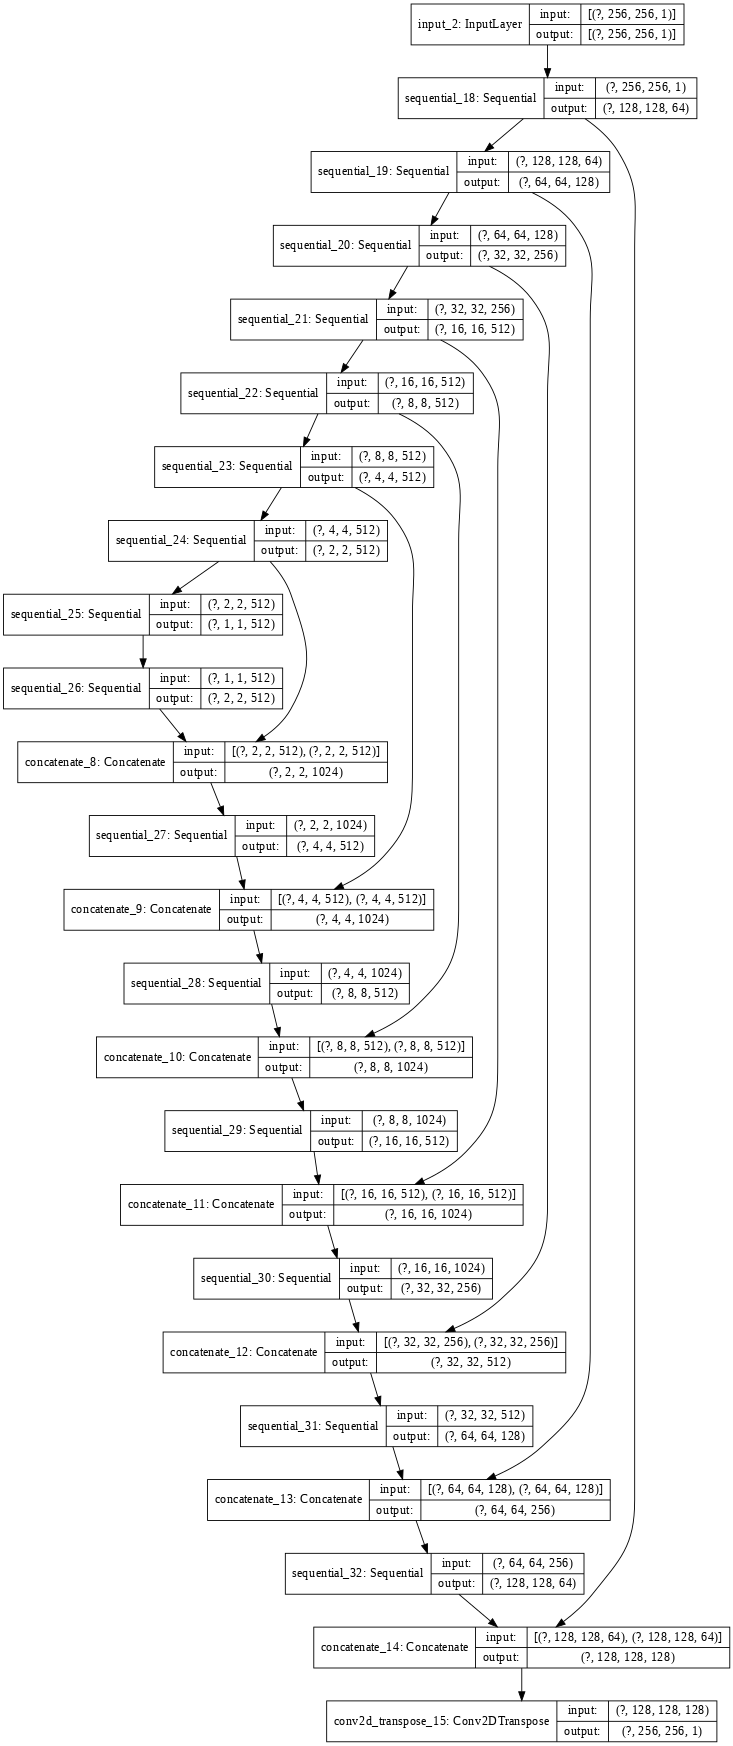

In [42]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, Concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal

def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result
 
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result
 
# define the standalone generator model
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 1])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(1, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 1)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

# Generator G
G = Generator()
G.summary()
tf.keras.utils.plot_model(G, show_shapes=True, dpi=64)


In [43]:
#Optimizers G
generator_optimizer = tf.keras.optimizers.Adam(g_lr, beta_1=beta_1)

## **Model D**

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
target_image (InputLayer)       [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
concatenate_15 (Concatenate)    (None, 256, 256, 2)  0           input_image[0][0]                
                                                                 target_image[0][0]               
__________________________________________________________________________________________________
sequential_33 (Sequential)      (None, 128, 128, 64) 2048        concatenate_15[0][0]  

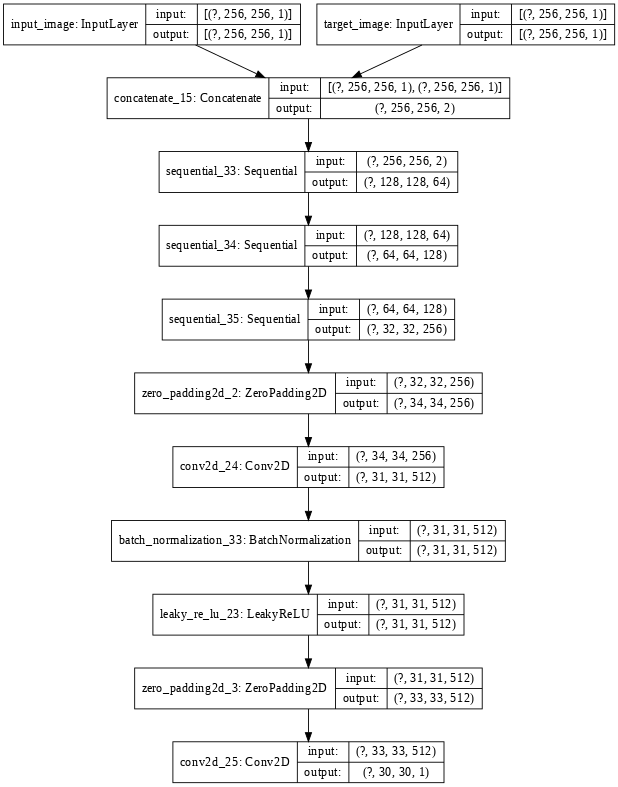

In [44]:
# define the discriminator model
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 1], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 1], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)


D = Discriminator()
D.summary()
tf.keras.utils.plot_model(D, show_shapes=True, dpi=64)

In [45]:
#Optimizers D
discriminator_optimizer = tf.keras.optimizers.Adam(d_lr, beta_1=beta_1)

# **Accuracy**

In [46]:
# def dice_coef(y_true, y_pred):
#     y_truef=K.flatten(y_true)
#     y_predf=K.flatten(y_pred)
#     And=K.sum(y_truef* y_predf)
#     return((2* And + smooth) / (K.sum(y_truef) + K.sum(y_predf) ))

# def iou(y_true, y_pred):
#     intersection = K.sum(y_true * y_pred)
#     sum_ = K.sum(y_true + y_pred)
#     jac = (intersection + smooth) / (sum_ - intersection)
#     return jac


# Accuracy (TP+TN)/(TP+TN+FP+FN)
# def Accuracy(y_true, y_pred):
#   y_true = (y_true+1)/2   #[-1,1] to [0,1]
#   y_pred = (y_pred+1)/2   #[-1,1] to [0,1]
#   y_true = tf.cast((y_true >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
#   y_pred = tf.cast((y_pred >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
#   #TruePositive
#   TP = y_true*y_pred
#   #FP
#   FP = 



from tensorflow.keras.metrics import Metric

# Accuracy (TP+TN)/(TP+TN+FP+FN)
def Accuracy(y_true, y_pred):
  y_true = (y_true+1)/2   #[-1,1] to [0,1]
  y_pred = (y_pred+1)/2   #[-1,1] to [0,1]
  y_true = tf.cast((y_true >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
  y_pred = tf.cast((y_pred >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
  # print(y_true)
  # print(y_pred)
  m = tf.keras.metrics.Accuracy()
  m.update_state(y_true, y_pred)
  out = m.result().numpy()
  return out


# Precision = TruePositive / (TruePositive + FalsePositive)
def Precision(y_true, y_pred): #K phat. khi doan sai 0->1
  y_true = (y_true+1)/2   #[-1,1] to [0,1]
  y_pred = (y_pred+1)/2   #[-1,1] to [0,1]
  y_true = tf.cast((y_true >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
  y_pred = tf.cast((y_pred >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
  # print(y_true)
  # print(y_pred)
  #TruePositive
  TP = y_true*y_pred
  pr = K.sum(TP) / K.sum(y_true)
  if tf.math.is_nan(pr):
     pr = tf.constant(0.0)
  return pr

# iou = true_positives / (true_positives + false_positives + false_negatives)
def IoU(y_true, y_pred):
  y_true = (y_true+1)/2   #[-1,1] to [0,1]
  y_pred = (y_pred+1)/2   #[-1,1] to [0,1]
  y_true = tf.cast((y_true >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
  y_pred = tf.cast((y_pred >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
  TP = y_true*y_pred
  FN = tf.nn.relu(y_pred - y_true) # <0 => = 0
  iou = K.sum(TP) / (K.sum(y_true) + K.sum(FN))
  if tf.math.is_nan(iou):
    iou = tf.constant(0.0)
  return iou

# Dice similarity coefficient (DSC)
# DSC = 2TP / (2TP + FP + FN)


a = tf.constant([[0.0, -1, -0.75, 0], [0, 0, 0, 0]]) # 6 , 7
b = tf.constant([[0.0, 1, -1, 0], [0.5, 0, 1, -0.5]]) #5
print(Precision(a,b))
print(IoU(a,b))


tf.Tensor(0.8333333, shape=(), dtype=float32)
tf.Tensor(0.71428573, shape=(), dtype=float32)


In [47]:
# from tensorflow.keras.metrics import Metric


# # Accuracy (TP+TN)/(TP+TN+FP+FN)
# def Accuracy(y_true, y_pred):
#   y_true = (y_true+1)/2   #[-1,1] to [0,1]
#   y_pred = (y_pred+1)/2   #[-1,1] to [0,1]
#   y_true = tf.cast((y_true >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
#   y_pred = tf.cast((y_pred >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
#   # print(y_true)
#   # print(y_pred)
#   m = tf.keras.metrics.Accuracy()
#   m.update_state(y_true, y_pred)
#   out = m.result().numpy()
#   return out

# def Precision(y_true, y_pred): #K phat. khi doan sai 0->1
#   y_true = (y_true+1)/2   #[-1,1] to [0,1]
#   y_pred = (y_pred+1)/2   #[-1,1] to [0,1]
#   y_true = tf.cast((y_true >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
#   y_pred = tf.cast((y_pred >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
#   m = tf.keras.metrics.Precision()
#   m.update_state(y_true, y_pred)
#   out = m.result().numpy()
#   return out

# def IoU(y_true, y_pred):
#   y_true = (y_true+1)/2   #[-1,1] to [0,1]
#   y_pred = (y_pred+1)/2   #[-1,1] to [0,1]
#   y_true = tf.cast((y_true >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
#   y_pred = tf.cast((y_pred >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
#   m = tf.keras.metrics.IoU(num_classes=2, target_class_ids=[0])
#   m.update_state(y_true, y_pred)
#   out = m.result().numpy()
#   return out


# a = tf.constant([[0.0, -1, -0.75, 0], [0, 0, 0, 0]])
# b = tf.constant([[0.0, 1, -1, 0], [0.5, 0, 1, -0.5]])
# print(Precision(a,b))
# print(Accuracy(a,b))
# # print(IoU(a,b))


## **Generate images**

In [48]:
def generate_images(model, test_input, tar):
  test_input= test_input[:,:,:,0]
  tar = tar[:,:,:,0]

  prediction = model(test_input, training=True)
  prediction = prediction[:,:,:,0]

  a = np.array(prediction[0])
  a = (a+1)/2   #[-1,1] to [0,1]
  a = tf.cast((a >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
  #Process

  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], a]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i], cmap='gray')
    plt.axis('off')
  plt.show()


# print(image_batch.shape, labels_batch.shape)
# generate_images(G, image_batch, labels_batch)
# print(np.min(image_batch), np.max(image_batch))
# print(np.min(labels_batch), np.max(labels_batch))


#**CHECKPOINT**

In [49]:
%cd /content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc
# Save model

# Chia theo BenhNhan
# checkpoint_dir = 'training_checkpoints/final/Lan1/best/'
# checkpoint_dir = 'training_checkpoints/final/Lan2/best/'
# checkpoint_dir = 'training_checkpoints/final/Lan3/best/'
# checkpoint_dir = 'training_checkpoints/final/Lan4/best/'
# checkpoint_dir = 'training_checkpoints/final/Lan5/best/'


# Chia theo ảnh
# checkpoint_dir = 'training_checkpoints/final/split_1/best/'
# checkpoint_dir = 'training_checkpoints/final/split_10/best/'
# checkpoint_dir = 'training_checkpoints/final/split_20/best/'
# checkpoint_dir = 'training_checkpoints/final/split_50/best/'
# checkpoint_dir = 'training_checkpoints/final/split_100/best/'


# Test Pix2Pix
# checkpoint_dir = 'training_checkpoints/final/Pix2Pix_split1/best/'
# checkpoint_dir = 'training_checkpoints/final/Pix2Pix_split10/best/'
# checkpoint_dir = 'training_checkpoints/final/Pix2Pix_split20/best/'
# checkpoint_dir = 'training_checkpoints/final/Pix2Pix_split50/best/'
checkpoint_dir = 'training_checkpoints/final/Pix2Pix_split100/best/'





checkpoint_prefix = os.path.join(checkpoint_dir+"step", "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator= G,
                                 discriminator= D)

#best
checkpoint_prefix_best = os.path.join(checkpoint_dir+"best", "ckpt")
checkpoint_best = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator= G,
                                 discriminator= D)

# Save history of loss funcion
log_dir="log/"

/content/drive/My Drive/Nam4_HK2/LV_CT595/BTLiem_Pix2Pix_DHYD_BaiBaoKhoaHoc


In [50]:
!ls {checkpoint_dir}

checkpoint  ckpt-26.data-00000-of-00001  ckpt-26.index


In [51]:
# Restoring the latest checkpoint in checkpoint_dir #Load G,D best
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))


# **Val**

In [ ]:
# Eval Val_ds
sum_Precision = 0.0
sum_IoU = 0.0
len_ds = 0
for img,tar in val_dataset:
  len_ds+=1
  g_out = G(img, training=True)
  pre = Precision(tar,g_out)
  iou = IoU(tar,g_out)
  if iou > 0:
    # len_ds+=1
    sum_IoU += iou
    sum_Precision += pre
  print(pre)
  print(iou)

avr_Precision = sum_Precision/len_ds
avr_IoU = sum_IoU/len_ds
print("Trung binh")
print(avr_Precision)
print(avr_IoU)
# tf.Tensor(0.6232435, shape=(), dtype=float32) bs64
# tf.Tensor(0.4297046, shape=(), dtype=float32)

# tf.Tensor(0.5304647, shape=(), dtype=float32) bs1
# tf.Tensor(0.35831028, shape=(), dtype=float32)

NameError: ignored

In [ ]:
# # Run the trained model on a few examples from the test set
# for inp, tar in val_dataset.take(200):
#   generate_images(G, inp, tar)

# **Test**

In [52]:
# Eval test_ds
sum_Acc = 0.0
sum_Precision = 0.0
sum_IoU = 0.0
len_ds = 0

vitri = 0
khongbatthuong = 0

tyle0 = 0
tyle1 = 0
tyle2 = 0
tyle3 = 0
tyle4 = 0
tyle5 = 0
tyle6 = 0
tyle7 = 0
tyle8 = 0
tyle9 = 0


 
print(len(test_dataset))
for img,tar in test_dataset:
  g_out = G(img, training=True)
  pre = Precision(tar,g_out)

  iou = IoU(tar,g_out)

  acc = Accuracy(tar,g_out)

  print("Accuracy")
  print(acc)
  print("Precision")
  print(pre)
  print("IoU")
  print(iou)
  if iou > 0:
    len_ds+=1
    sum_IoU += iou
    sum_Precision += pre

  # len_ds+=1
  # sum_IoU += iou
  # sum_Precision += pre

  sum_Acc += acc 

  if iou == 0:
    vitri+=1

  if iou > 0:
    tyle0 += 1
  if iou > 0.1:
    tyle1 += 1
  if iou > 0.2:
    tyle2 += 1
  if iou > 0.3:
    tyle3 += 1
  if iou > 0.4:
    tyle4 += 1
  if iou > 0.5:
    tyle5 += 1
  if iou > 0.6:
    tyle6 += 1
  if iou > 0.7:
    tyle7 += 1
  if iou > 0.8:
    tyle8 += 1
  if iou > 0.9:
    tyle9 += 1

  # anh 0 bat thuong -> detect 0 bat thuong
  g_out = (g_out+1)/2   #[-1,1] to [0,1]
  tar = (tar+1)/2   #[-1,1] to [0,1]
  g_out = tf.cast((g_out >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
  tar = tf.cast((tar >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0

  # print(g_out.shape, tar.shape)
  # print(np.max(tar), np.max(g_out))
  if np.max(tar) == 0 and np.max(g_out) == 0:
    print("KHONG BAT THUONG ======================================================")
    generate_images(G, img, tar)

    khongbatthuong +=1
    vitri -=1



  # if pre == 0:
    # generate_images(G, img, tar)



avr_Acc = sum_Acc/len(final_dataset)  
avr_Precision = sum_Precision/len_ds
avr_IoU = sum_IoU/len_ds

print("trung binh: ")
print(avr_Acc)
print(avr_Precision)
print(avr_IoU)
print('iou>0: {}'.format(len_ds))
print("iou=0: {}".format(vitri))
print('00 01 02 03 04 05 06 07 08 09')
print(tyle0,tyle1,tyle2,tyle3,tyle4,tyle5,tyle6,tyle7,tyle8,tyle9)
print("So anh k bat thuong => du doan' khong bat thuong: {}".format(khongbatthuong))

# Split
# (431, 4) (121, 4)
# (431, 4) (120, 4)
# (431, 4) (107, 4)
# (431, 4) (129, 4)
# (431, 4) (126, 4)

Output hidden; open in https://colab.research.google.com to view.

In [53]:
# Run the trained model on a few examples from the test set
print(tf.data.experimental.cardinality(test_dataset))

for inp, tar in test_dataset.take(700):
  generate_images(G, inp, tar)
  g_out = G(inp, training=True)
  pre = Precision(tar,g_out)
  iou = IoU(tar,g_out)
  acc = Accuracy(tar,g_out)
  print('Accuracy: '+str(acc))
  print("presicion:         "+str(pre))
  print("IOU:      "+str(iou))

Output hidden; open in https://colab.research.google.com to view.

# **Final**

In [ ]:
# # Eval test_ds
# sum_Acc = 0.0
# sum_Precision = 0.0
# sum_IoU = 0.0
# len_ds = 0

# vitri = 0
# tyle1 = 0
# tyle2 = 0
 
# print(len(final_dataset))
# for img,tar in final_dataset:
#   g_out = G(img, training=True)
#   pre = Precision(tar,g_out)

#   iou = IoU(tar,g_out)

#   acc = Accuracy(tar,g_out)

#   print("Accuracy")
#   print(acc)
#   print("Precision")
#   print(pre)
#   print("IoU")
#   print(iou)
#   if iou > 0:
#     len_ds+=1
#     sum_IoU += iou
#     sum_Precision += pre

#   # len_ds+=1
#   # sum_IoU += iou
#   # sum_Precision += pre

#   sum_Acc += acc 

#   if iou == 0:
#     vitri+=1
#   if pre > 0 and pre < 0.5:
#     tyle1 += 1
#   if pre >= 0.5:
#     tyle2 += 1
  

#   # anh 0 bat thuong -> detect 0 bat thuong
#   g_out = (g_out+1)/2   #[-1,1] to [0,1]
#   tar = (tar+1)/2   #[-1,1] to [0,1]
#   g_out = tf.cast((g_out >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
#   tar = tf.cast((tar >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0

#   # print(g_out.shape, tar.shape)
#   # print(np.max(tar), np.max(g_out))
#   if np.max(tar) == 0 and np.max(g_out) == 0:
#     print("KHONG BAT THUONG ======================================================")
#     generate_images(G, img, tar)


#   # if pre == 0:
#     # generate_images(G, img, tar)



# avr_Acc = sum_Acc/len(final_dataset)  
# avr_Precision = sum_Precision/len_ds
# avr_IoU = sum_IoU/len_ds

# print("trung binh: ")
# print(avr_Acc)
# print(avr_Precision)
# print(avr_IoU)
# print(len_ds)
# print("=0")
# print(vitri)
# print(tyle1,tyle2)

96
Accuracy
0.99993896
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
1.0
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
KHONG BAT THUONG ======================================================


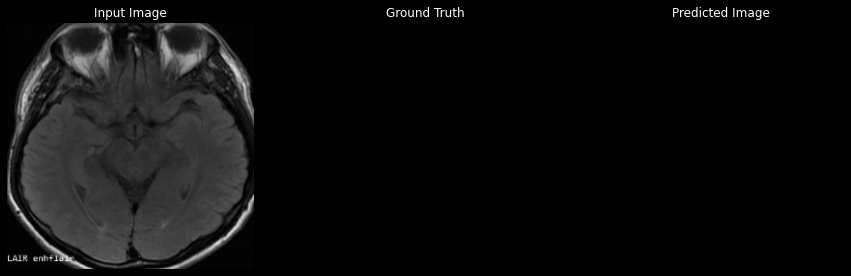

Accuracy
0.95558167
Precision
tf.Tensor(0.74948347, shape=(), dtype=float32)
IoU
tf.Tensor(0.749419, shape=(), dtype=float32)
Accuracy
0.9984894
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
0.98095703
Precision
tf.Tensor(0.8600131, shape=(), dtype=float32)
IoU
tf.Tensor(0.83993846, shape=(), dtype=float32)
Accuracy
0.9743805
Precision
tf.Tensor(0.3711098, shape=(), dtype=float32)
IoU
tf.Tensor(0.2734747, shape=(), dtype=float32)
Accuracy
0.95925903
Precision
tf.Tensor(0.41060126, shape=(), dtype=float32)
IoU
tf.Tensor(0.36834633, shape=(), dtype=float32)
Accuracy
0.9931793
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
0.9532318
Precision
tf.Tensor(0.73385084, shape=(), dtype=float32)
IoU
tf.Tensor(0.72151554, shape=(), dtype=float32)
Accuracy
0.9953766
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
0.99998474
Precisio

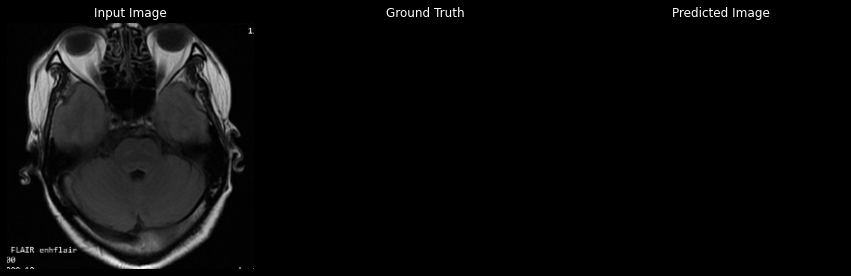

Accuracy
0.9981842
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
0.998703
Precision
tf.Tensor(0.39716312, shape=(), dtype=float32)
IoU
tf.Tensor(0.39716312, shape=(), dtype=float32)
Accuracy
0.9570923
Precision
tf.Tensor(0.05732484, shape=(), dtype=float32)
IoU
tf.Tensor(0.05732484, shape=(), dtype=float32)
Accuracy
0.9895172
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
0.9975128
Precision
tf.Tensor(0.8435374, shape=(), dtype=float32)
IoU
tf.Tensor(0.75265557, shape=(), dtype=float32)
Accuracy
0.94311523
Precision
tf.Tensor(0.6236244, shape=(), dtype=float32)
IoU
tf.Tensor(0.5777073, shape=(), dtype=float32)
Accuracy
0.9466858
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
0.996521
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
0.9358673
Precision
tf.Tensor(0.368

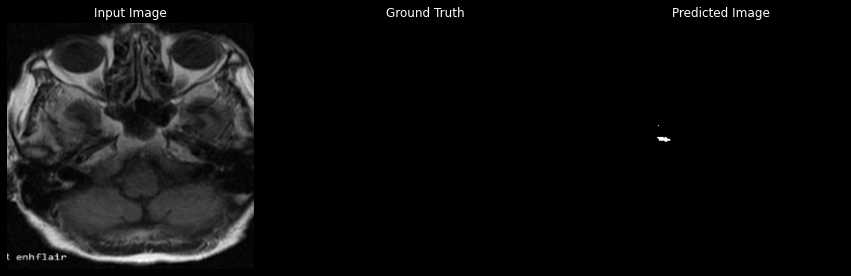

Accuracy
0.9742737
Precision
tf.Tensor(0.81651586, shape=(), dtype=float32)
IoU
tf.Tensor(0.80678433, shape=(), dtype=float32)
Accuracy
0.9993744
Precision
tf.Tensor(0.6967213, shape=(), dtype=float32)
IoU
tf.Tensor(0.67460316, shape=(), dtype=float32)
Accuracy
0.9868469
Precision
tf.Tensor(0.8842105, shape=(), dtype=float32)
IoU
tf.Tensor(0.5770363, shape=(), dtype=float32)
Accuracy
0.92329407
Precision
tf.Tensor(0.24085851, shape=(), dtype=float32)
IoU
tf.Tensor(0.1942619, shape=(), dtype=float32)
Accuracy
0.9991913
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
0.9966736
Precision
tf.Tensor(0.7422003, shape=(), dtype=float32)
IoU
tf.Tensor(0.6746269, shape=(), dtype=float32)
Accuracy
0.8348541
Precision
tf.Tensor(0.062061194, shape=(), dtype=float32)
IoU
tf.Tensor(0.06205044, shape=(), dtype=float32)
Accuracy
0.97654724
Precision
tf.Tensor(0.3582931, shape=(), dtype=float32)
IoU
tf.Tensor(0.22452068, shape=(), dtype=float32)
Ac

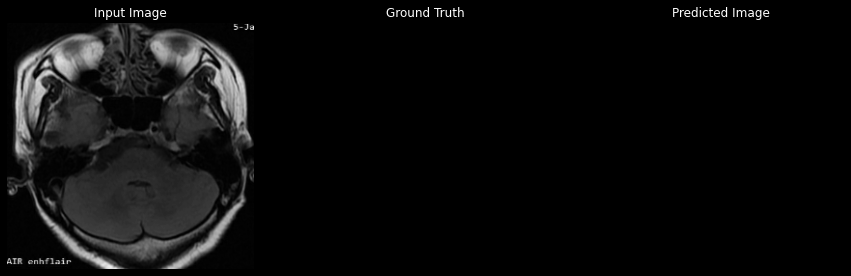

Accuracy
1.0
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
KHONG BAT THUONG ======================================================


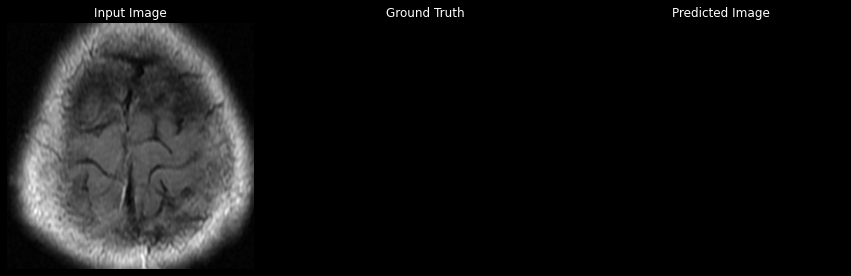

Accuracy
0.9854126
Precision
tf.Tensor(0.9814324, shape=(), dtype=float32)
IoU
tf.Tensor(0.43632075, shape=(), dtype=float32)
Accuracy
0.9948425
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
0.9730835
Precision
tf.Tensor(0.10493477, shape=(), dtype=float32)
IoU
tf.Tensor(0.09492047, shape=(), dtype=float32)
Accuracy
0.9815979
Precision
tf.Tensor(0.7614679, shape=(), dtype=float32)
IoU
tf.Tensor(0.71802664, shape=(), dtype=float32)
Accuracy
0.9806824
Precision
tf.Tensor(0.714119, shape=(), dtype=float32)
IoU
tf.Tensor(0.7073509, shape=(), dtype=float32)
Accuracy
0.9963684
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
1.0
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
KHONG BAT THUONG ======================================================


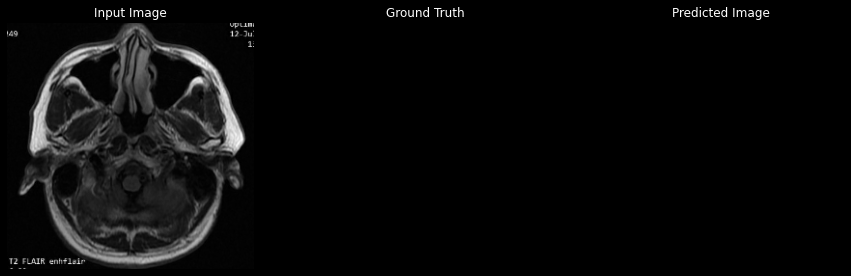

Accuracy
1.0
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
KHONG BAT THUONG ======================================================


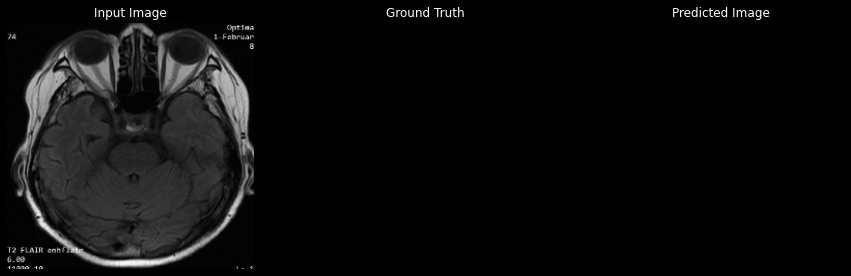

Accuracy
0.803833
Precision
tf.Tensor(0.15383595, shape=(), dtype=float32)
IoU
tf.Tensor(0.15287296, shape=(), dtype=float32)
Accuracy
0.8369293
Precision
tf.Tensor(0.17510763, shape=(), dtype=float32)
IoU
tf.Tensor(0.17308883, shape=(), dtype=float32)
Accuracy
0.94932556
Precision
tf.Tensor(0.47795224, shape=(), dtype=float32)
IoU
tf.Tensor(0.40086594, shape=(), dtype=float32)
Accuracy
0.9886017
Precision
tf.Tensor(0.74088293, shape=(), dtype=float32)
IoU
tf.Tensor(0.60787404, shape=(), dtype=float32)
Accuracy
0.99742126
Precision
tf.Tensor(0.88547486, shape=(), dtype=float32)
IoU
tf.Tensor(0.6522634, shape=(), dtype=float32)
Accuracy
0.8611145
Precision
tf.Tensor(0.20115851, shape=(), dtype=float32)
IoU
tf.Tensor(0.20115851, shape=(), dtype=float32)
Accuracy
0.92308044
Precision
tf.Tensor(0.29826525, shape=(), dtype=float32)
IoU
tf.Tensor(0.2972257, shape=(), dtype=float32)
Accuracy
0.95259094
Precision
tf.Tensor(0.5586457, shape=(), dtype=float32)
IoU
tf.Tensor(0.47150877, shape=(),

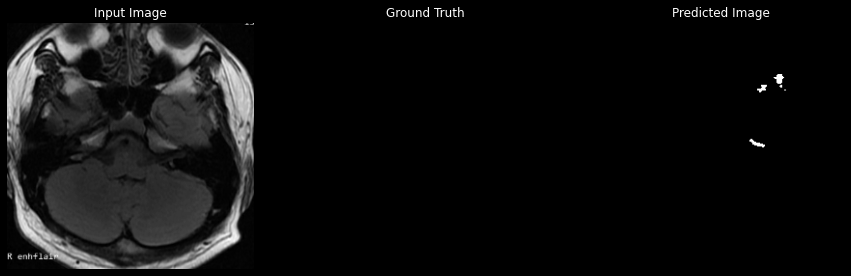

Accuracy
0.9359131
Precision
tf.Tensor(0.41125107, shape=(), dtype=float32)
IoU
tf.Tensor(0.40619257, shape=(), dtype=float32)
Accuracy
1.0
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
KHONG BAT THUONG ======================================================


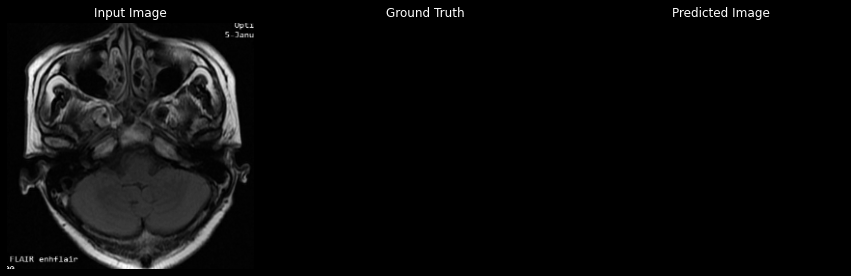

Accuracy
0.9941406
Precision
tf.Tensor(0.5978407, shape=(), dtype=float32)
IoU
tf.Tensor(0.5356711, shape=(), dtype=float32)
Accuracy
0.95887756
Precision
tf.Tensor(0.13439119, shape=(), dtype=float32)
IoU
tf.Tensor(0.13344051, shape=(), dtype=float32)
Accuracy
0.98088074
Precision
tf.Tensor(0.5757036, shape=(), dtype=float32)
IoU
tf.Tensor(0.56326246, shape=(), dtype=float32)
Accuracy
0.99157715
Precision
tf.Tensor(0.09137056, shape=(), dtype=float32)
IoU
tf.Tensor(0.031578947, shape=(), dtype=float32)
Accuracy
0.92211914
Precision
tf.Tensor(0.31512353, shape=(), dtype=float32)
IoU
tf.Tensor(0.23512663, shape=(), dtype=float32)
Accuracy
1.0
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
KHONG BAT THUONG ======================================================


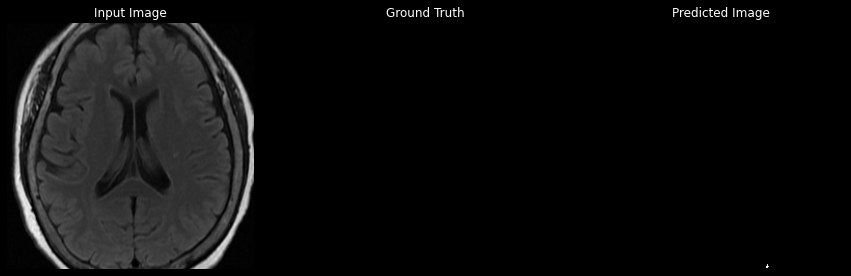

Accuracy
0.9994354
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
0.9922943
Precision
tf.Tensor(0.9196456, shape=(), dtype=float32)
IoU
tf.Tensor(0.85633004, shape=(), dtype=float32)
Accuracy
1.0
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
KHONG BAT THUONG ======================================================


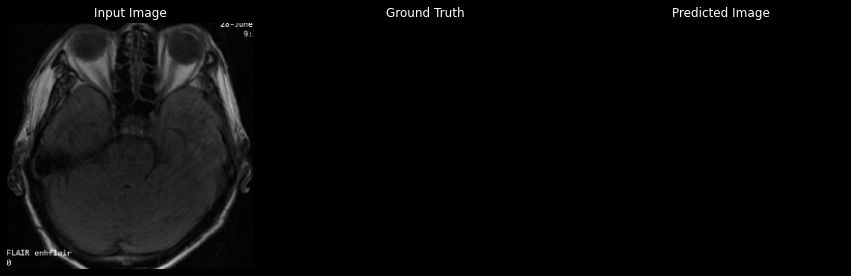

Accuracy
0.97817993
Precision
tf.Tensor(0.7276642, shape=(), dtype=float32)
IoU
tf.Tensor(0.7027027, shape=(), dtype=float32)
Accuracy
0.98942566
Precision
tf.Tensor(0.5711319, shape=(), dtype=float32)
IoU
tf.Tensor(0.44247788, shape=(), dtype=float32)
Accuracy
0.8890686
Precision
tf.Tensor(0.44823638, shape=(), dtype=float32)
IoU
tf.Tensor(0.44676965, shape=(), dtype=float32)
Accuracy
0.99702454
Precision
tf.Tensor(0.0, shape=(), dtype=float32)
IoU
tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy
0.9892273
Precision
tf.Tensor(0.36416185, shape=(), dtype=float32)
IoU
tf.Tensor(0.30852106, shape=(), dtype=float32)
Accuracy
0.97172546
Precision
tf.Tensor(0.01961824, shape=(), dtype=float32)
IoU
tf.Tensor(0.019576719, shape=(), dtype=float32)
Accuracy
0.88731384
Precision
tf.Tensor(0.38284054, shape=(), dtype=float32)
IoU
tf.Tensor(0.37758112, shape=(), dtype=float32)
Accuracy
0.95329285
Precision
tf.Tensor(0.689218, shape=(), dtype=float32)
IoU
tf.Tensor(0.6788038, shape=(), dtype=float3

In [ ]:
# Eval test_ds
sum_Acc = 0.0
sum_Precision = 0.0
sum_IoU = 0.0
len_ds = 0

vitri = 0
khongbatthuong = 0

tyle0 = 0
tyle1 = 0
tyle2 = 0
tyle3 = 0
tyle4 = 0
tyle5 = 0
tyle6 = 0
tyle7 = 0
tyle8 = 0
tyle9 = 0


 
print(len(final_dataset))
for img,tar in final_dataset:
  g_out = G(img, training=True)
  pre = Precision(tar,g_out)

  iou = IoU(tar,g_out)

  acc = Accuracy(tar,g_out)

  print("Accuracy")
  print(acc)
  print("Precision")
  print(pre)
  print("IoU")
  print(iou)
  if iou > 0:
    len_ds+=1
    sum_IoU += iou
    sum_Precision += pre

  # len_ds+=1
  # sum_IoU += iou
  # sum_Precision += pre

  sum_Acc += acc 

  if iou == 0:
    vitri+=1

  if iou > 0:
    tyle0 += 1
  if iou > 0.1:
    tyle1 += 1
  if iou > 0.2:
    tyle2 += 1
  if iou > 0.3:
    tyle3 += 1
  if iou > 0.4:
    tyle4 += 1
  if iou > 0.5:
    tyle5 += 1
  if iou > 0.6:
    tyle6 += 1
  if iou > 0.7:
    tyle7 += 1
  if iou > 0.8:
    tyle8 += 1
  if iou > 0.9:
    tyle9 += 1

  # anh 0 bat thuong -> detect 0 bat thuong
  g_out = (g_out+1)/2   #[-1,1] to [0,1]
  tar = (tar+1)/2   #[-1,1] to [0,1]
  g_out = tf.cast((g_out >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0
  tar = tf.cast((tar >= 0.5), tf.float32) #> 0.5 = 1, <0.5 = 0

  # print(g_out.shape, tar.shape)
  # print(np.max(tar), np.max(g_out))
  if np.max(tar) == 0 and np.max(g_out) == 0:
    print("KHONG BAT THUONG ======================================================")
    generate_images(G, img, tar)

    khongbatthuong +=1
    vitri -=1



  # if pre == 0:
    # generate_images(G, img, tar)



avr_Acc = sum_Acc/len(final_dataset)  
avr_Precision = sum_Precision/len_ds
avr_IoU = sum_IoU/len_ds

print("trung binh: ")
print(avr_Acc)
print(avr_Precision)
print(avr_IoU)
print('iou>0: {}'.format(len_ds))
print("iou=0: {}".format(vitri))
print('00 01 02 03 04 05 06 07 08 09')
print(tyle0,tyle1,tyle2,tyle3,tyle4,tyle5,tyle6,tyle7,tyle8,tyle9)
print("So anh k bat thuong => du doan' khong bat thuong: {}".format(khongbatthuong))

In [ ]:
# Run the trained model on a few examples from the test set
print(tf.data.experimental.cardinality(final_dataset))

for inp, tar in final_dataset.take(700):
  generate_images(G, inp, tar)
  g_out = G(inp, training=True)
  pre = Precision(tar,g_out)
  iou = IoU(tar,g_out)
  acc = Accuracy(tar,g_out)
  print('Accuracy: '+str(acc))
  print("presicion:         "+str(pre))
  print("IOU:      "+str(iou))

Output hidden; open in https://colab.research.google.com to view.